# Analytic Report Project

## Given the dataset
(http://www.kaggle.com/pavansunhasht/ibm-hr-analytics-attrition-dataset)
, create an analytic report to answer three below questions.
The report should include the introduction, describing the data, visualizations (scatter plot, bar graph, histogram
boxplot, subplot, pie chart, heat map, etc.,
each graph should have an explained analysis followed),
filtering data to different categories, analysis (include t-test or Mann-whitney for Hypothesis testing)
and conclusions.
1. What are key factors that are playing into current attrition rates?
2. What are key factors that are playing into current satisfaction rates?
3. When are employees leaving?

## This is a fictional data set created by IBM data scientists. 
There are 7 factors that lead to employee attrition and explore the important hided insights.
1. Education (Below College/ College/ Bachelor/ Master/ Doctor)
2. EnviromentSatisfaction (Low/ Medium/High/ Very High)
3. JobInvolvement (Low/ Medium/ High/ Very High)
4. JobSatisfaction (Low/ Medium/ High/ Very High)
5. PerformanceRating (Low/ Good/ Excellent/ Outstanding)
6. RelationshipSatisfaction (Low/ Medium/ High/ Very High)
7. WorkLifeBalance (Bad/ Good/ Better/ Best)

## Index 

#### 1. Import required packages and data

#### 2. Dealling with data
    2.1 Understanding Data Source
        - Size and shape of dataset
        - Data Dictionary

    2.2 Data issues 
        - Dirty Data
        - Missing Data
        - Outlier Data
        - Informative/Repetitive Features
        - Duplicate Data
    2.3 Dealing with data
        - Eliminate irrevalent columns
        - Remove duplicate Rows/Columns
        - Cleansing missing data
####  3. Descriptive Analysis
    3.1 Univariate Analysis
        - Categorical Variables
        - Ordinal Variables
        - Numerical Variables
    3.2 Bivariate Analysis
        - Categorical Variables
        - Ordinal Variables
        - Numerical Variables 
    3.3 Multivariate Analysis
        - Attrition & Gender VS other Variables
        - Attrition & Education VS other Variables
        - Attrition & JobRole VS other Variables
####  4. Correlation 
        - Key factors impact to Attrition 
        - Key factors impact to JobsSatisfaction
        - Attrition Rate by Department
        - Attrition Rate by JobRole

###     **1. Import required packages and data**

In [134]:
# Import required packages
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
HR_Dict = pd.read_csv("E:\IT\COURSES\PYTHON\DATA SCIENCE\Homework\WA_Fn-UseC_-HR-Employee-Attrition.csv")
HR_Dict.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


###     **2. Dealing with Dataset**
- 2.1 Understanding Data Source
- 2.2 Data issues 
- 2.3 Dealing with data

#### **2.1 Understanding Data Source**

**Size and shape of dataset**

In [4]:
size = HR_Dict.size
shape = HR_Dict.shape
ndim = HR_Dict.ndim

# printing size and shape
print('Printing size and shape_ Return size and shape')
print('Size = {}\nShape ={}\nShape[0] x Shape[1] = {}'.format(size, shape, shape[0]*shape[1]))
print(' Number of dimensions in the data : ',ndim)

Printing size and shape_ Return size and shape
Size = 51450
Shape =(1470, 35)
Shape[0] x Shape[1] = 51450
 Number of dimensions in the data :  2


In [5]:
HR_Dict.dtypes.value_counts()
print(HR_Dict.dtypes.value_counts())


int64     26
object     9
dtype: int64


**Comments**:
>- A 2D table in tabular form ( 1.470 Observations x 35 Features)
- Structered data
- There are 9 Categorical and 26 Numerical Variables

**Data Dictionary**

In [5]:
import chardet

with open('E:\IT\COURSES\PYTHON\DATA SCIENCE\Homework\HR_Project_Data Dictionary.csv', 'rb') as f:
    result = chardet.detect(f.read()) #
HR_Dictionary = pd.read_csv('E:\IT\COURSES\PYTHON\DATA SCIENCE\Homework\HR_Project_Data Dictionary.csv', encoding= result['encoding'])
HR_Dictionary

,Field Name,Description,Data File,Data Format,Example,Data Types
0,Age,Employee Age,Integer,NaN,41,Numerical - Ratio
1,Attrition,Staff attrition refers to the loss of employee...,Text,Yes/No,Yes,Categorical - Nominal
2,BusinessTravel,Ranking the level of travelling for work,Text,Non_Travel/Travel_Rarely/Travel_Frequently,Travel_Rarely,Categorical - Nominal
3,DailyRate,Amount of remuneration a employee receives for...,Integer,102 - 1499,1102,Numerical - Ratio
4,Department,Department Name,Text,Sales/R&D/HR,Sales,Categorical - Nominal
5,DistanceFromHome,Distance from Home to work,Integer,47119,1,Numerical - Ratio
6,Education,Employee Education,Integer,01 - -05,2,Categorical - Ordinal
7,EducationField,Employee Education Field,Integer,in 6 Fields,Life Sciences,Categorical - Nominal
8,EmployeeCount,count 1,Integer,1 - blank (1 case),1,Numerical - Ratio
9,EmployeeNumber,Employee Number,Integer,NaN,1,Numerical - Internal


#### **2.2 Data Issues**

**Dirty Data** (Negative values/Wrong datatypes/Special Characters)

In [101]:
# Negative values
HR_Dict_Num[HR_Dict_Num<0].count()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [103]:
# Find wrong datatypes 
HR_Dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [119]:
# Special characters
import re
p = re.compile('!@#$%^&*()_+<>?}{ ')

for col in HR_Dict.columns:
    print('{} : {} {} {}'.format(col,' has', len(p.findall(col)), 'special characters'))

Age :  has 0 special characters
Attrition :  has 0 special characters
BusinessTravel :  has 0 special characters
DailyRate :  has 0 special characters
Department :  has 0 special characters
DistanceFromHome :  has 0 special characters
Education :  has 0 special characters
EducationField :  has 0 special characters
EmployeeNumber :  has 0 special characters
EnvironmentSatisfaction :  has 0 special characters
Gender :  has 0 special characters
HourlyRate :  has 0 special characters
JobInvolvement :  has 0 special characters
JobLevel :  has 0 special characters
JobRole :  has 0 special characters
JobSatisfaction :  has 0 special characters
MaritalStatus :  has 0 special characters
MonthlyIncome :  has 0 special characters
MonthlyRate :  has 0 special characters
NumCompaniesWorked :  has 0 special characters
OverTime :  has 0 special characters
PercentSalaryHike :  has 0 special characters
PerformanceRating :  has 0 special characters
RelationshipSatisfaction :  has 0 special characters
St

**Comments**:
>The dataset has no Negative Values, Wrong datatypes or Scpecial Characters

**Missing Data**(Missing Heatmap/ Data % list)

<AxesSubplot:>

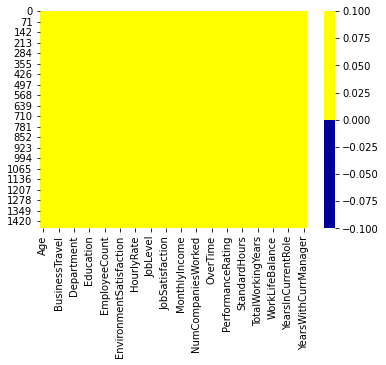

In [7]:
# Missing Data heatmap
cols = HR_Dict.columns
colors = ['#000099','#ffff00']  # dark blue, yellow
sns.heatmap(HR_Dict[cols].isnull(),cmap = sns.color_palette(colors))

In [77]:
# Create Data % List
for col in HR_Dict:
    pct_missing = np.mean(HR_Dict[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

Age - 0%
Attrition - 0%
BusinessTravel - 0%
DailyRate - 0%
Department - 0%
DistanceFromHome - 0%
Education - 0%
EducationField - 0%
EmployeeCount - 0%
EmployeeNumber - 0%
EnvironmentSatisfaction - 0%
Gender - 0%
HourlyRate - 0%
JobInvolvement - 0%
JobLevel - 0%
JobRole - 0%
JobSatisfaction - 0%
MaritalStatus - 0%
MonthlyIncome - 0%
MonthlyRate - 0%
NumCompaniesWorked - 0%
Over18 - 0%
OverTime - 0%
PercentSalaryHike - 0%
PerformanceRating - 0%
RelationshipSatisfaction - 0%
StandardHours - 0%
StockOptionLevel - 0%
TotalWorkingYears - 0%
TrainingTimesLastYear - 0%
WorkLifeBalance - 0%
YearsAtCompany - 0%
YearsInCurrentRole - 0%
YearsSinceLastPromotion - 0%
YearsWithCurrManager - 0%


In [121]:
HR_Dict.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**Comments**:
>The dataset has no null value

**Outliers Data**

In [ ]:
# We will discuss later

**Uninformative/Repetitive Features**

In [76]:
num_rows = len(HR_Dict.index) # 1470 rows
low_information_cols = [] #

for col in HR_Dict.columns:
    cnts = HR_Dict[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}:{1:5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

EmployeeCount:100.000000%
1    1470
Name: EmployeeCount, dtype: int64

Over18:100.000000%
Y    1470
Name: Over18, dtype: int64

StandardHours:100.000000%
80    1470
Name: StandardHours, dtype: int64



**Comments**:
> There are 3 uninformative columns (EmployeeCount/Over18/StandardHours)

**Duplicate Data**

In [65]:
# Check whether feature 'EmployeeNumber' is unique
HR_Dict.duplicated(subset = 'EmployeeNumber').sum()

0

**Comments**:
> There is no duplicate rows

#### **2.3 Dealing with data**

**Eliminate irrelevant columns in the analysis**

In [8]:
# Before 
HR_Dict.shape

(1470, 35)

In [9]:
# drop columns'EmployeeCount/Over18/StandardHours which are uninformative/Repetitive
HR_Dict = HR_Dict.drop(['EmployeeCount','Over18','StandardHours'], axis = 1)

In [10]:
HR_Dict.shape

(1470, 32)

**Remove duplicate columns/rows in Dataset**

In [ ]:
# Drop columns/Rows : use function Drop()

**Cleansing missing data**

In [ ]:
# Remove missing data: use function drop('Column_Name',1)
# Replace by value 9999 or unknow : fillna('New_value')
# Replace by Statistical values (mean/mode/varian): fillna(New_value)
# Predict

####  **3. Descriptive Analysis**
    3.1 Univariate Analysis
        - Categorical Variables
        - Ordinal Variables
        - Numerical Variables
    3.2 Bivariate Analysis
        - Categorical Variables
        - Ordinal Variables
        - Numerical Variables 
    3.3 Multivariate Analysis
        - Attrition & Gender VS other Variables
        - Attrition & Education VS other Variables
        - Attrition & JobRole VS other Variables

##### **3.1 Univariate Analysis**

In [99]:
HR_Dict.dtypes.value_counts()

int64     24
object     8
dtype: int64

**Categorical variables**

In [98]:
# discribe categorical features
HR_Dict.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


**Comments:**

From the dataset, it is clear to find some characteristic features as belows:
> * 84% of employees are working and 16%  were out of work.
* Almost Rarely travelling (71%)
* 65.4%  are working in the R&D department
* 41% come from Life Sciences field
* 60% are men
* More than a fifth are Sales Executive
* More than half of them are married
* 71% have worked overtime

In [97]:
# Detail of Categorical Ordinal Features
num_rows = len(HR_Dict.index) # 1470 rows
information_cols = [] #

# 1. Pick out the columns with datatypes that are object
Cate_cols = HR_Dict.select_dtypes(object).columns

for col in Cate_cols:
    cnts = HR_Dict[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    information_cols.append(col)
    print('{0}:{1:5f}%'.format(col, top_pct*100))
    print(cnts)
    print()

Attrition:83.877551%
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel:70.952381%
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department:65.374150%
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField:41.224490%
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender:60.000000%
Male      882
Female    588
Name: Gender, dtype: int64

JobRole:22.176871%
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus:4

In [155]:
# create function Show_values_on_bar:
def show_values_on_bar(axs):
    def _show_on_simple_spot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width()/2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format (p.get_height())
            ax.text(_x, _y, value, ha = 'center')
    
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate():
            _show_on_simple_spot(ax)
    
    else:
        _show_on_simple_spot(axs)


*Discribe Binary/Trinary_value Variables*

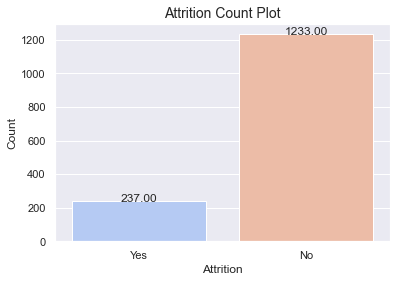

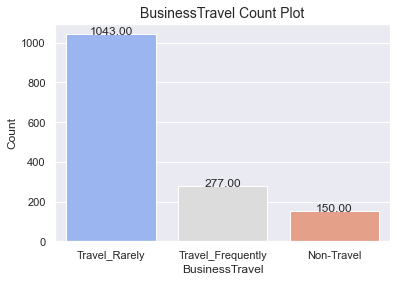

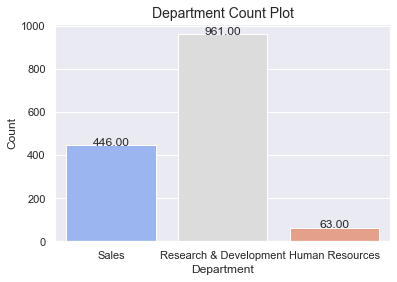

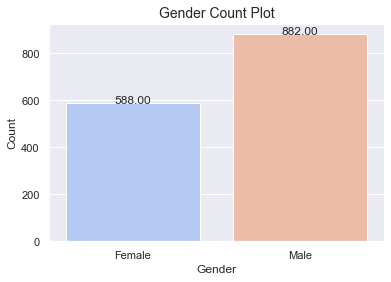

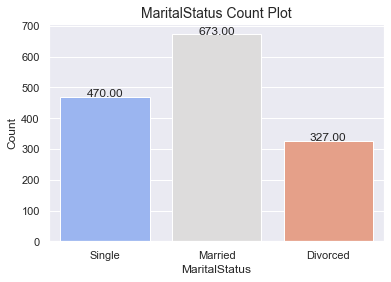

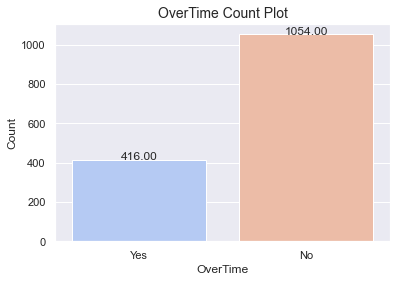

In [169]:
Cate_cols_1 = Cate_cols.drop(['EducationField','JobRole'])

# Visualize Cate_cols_1
for col in Cate_cols_1:
    sns_t = sns.countplot(x = col, data = HR_Dict, palette = 'coolwarm')
    plt.title (col + " Count Plot", fontdict={'fontsize':14})
    plt.xlabel(col)
    plt.ylabel("Count")
    show_values_on_bar(sns_t)

    plt.show()

*Describe features having multiple values* `('EducationField','JobRole')`

In [159]:
# Use the .value_counts method to summarize a column:
num_rows = len(HR_Dict.index)
cnts = HR_Dict.EducationField.value_counts()
top_pct = (cnts/num_rows).iloc[0]
pct = (cnts/num_rows)
    
print('{0}:{1:5f}%'.format(col, top_pct*100))
print(cnts)
print()


OverTime:41.224490%
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64



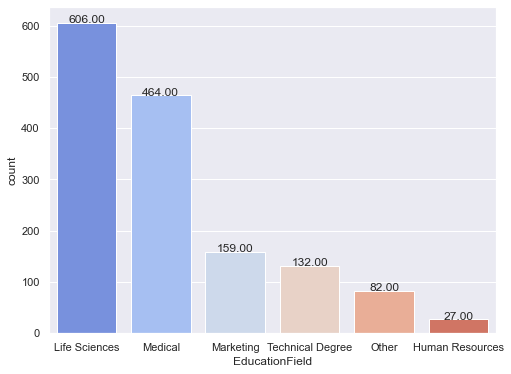

In [362]:
# Use seaborn to plot the counts and visualize them:
fig, ax = plt.subplots(figsize = (8, 6))
snt_E = sns.countplot( x= 'EducationField'
                       , data = HR_Dict
                       , palette = 'coolwarm'
                       , order = HR_Dict.EducationField.value_counts().index
                     )
show_values_on_bar(snt_E)
plt.show()


**Comments**:
> * The field at the top is Life Sciences Field (41%) , followed by Medical (32%) and Marketing Fields (11%).

In [170]:
# Use the .value_counts method to summarize a column:
num_rows = len(HR_Dict.index)
cnts = HR_Dict.JobRole.value_counts()
top_pct = (cnts/num_rows).iloc[0]
pct = (cnts/num_rows)
    
print('{0}:{1:5f}%'.format(col, top_pct*100))
print(cnts)
print()


OverTime:22.176871%
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64



In [185]:
# look at top 5 and collapse the remaining values:
top_5 = HR_Dict.JobRole.value_counts().index[:5]
(
    HR_Dict.assign( 
                    JobRole = HR_Dict.JobRole.where
                                        ( HR_Dict.JobRole.isin(top_5), "Other")
                    ).JobRole.value_counts()
)

Sales Executive              326
Other                        317
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: JobRole, dtype: int64

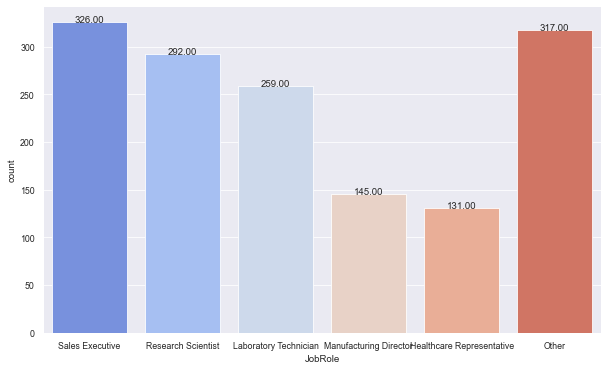

In [531]:
# Use seaborn to plot the counts and visualize them:
fig, ax = plt.subplots(figsize = (10,6))
top_5 = HR_Dict.JobRole.value_counts().index[:5]
sns_t = sns.countplot( x = 'JobRole',
                       data = ( 
                                HR_Dict.assign(
                                                JobRole = HR_Dict.JobRole.where
                                                ( HR_Dict.JobRole.isin(top_5), 'Other')
                                                )
                               ),
                       palette = 'coolwarm'


                      )
show_values_on_bar(sns_t)
plt.show()

**Comments**:
> * Top 3 are Sales Executive (22%), Research Scientist (20%) and Lab Technician (18%)

**Numerical variables**

In [ ]:
Ratio_Num_cols_ = HR_Dict[['Age','DailyRate','DistanceFromHome','HourlyRate'
                       ,'MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike'
                       , 'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear'
                       ,'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [34]:
# Get the summary statistics
HR_Dict.describe(include = 'int64').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Comments**:
> * 8  Categorical Ordinal Variables (assesement the level of
``` (Education/EnvironmentSatisfaction/JobInvolvement/JobLevel/JobSatisfaction ```
```      /PerformanceRating/RelationshipSatisfaction/WorklifeBalance) ```
* 18 Numerical Variables. In which, feature `EmployeeCount` have no value in this analysis => drop this feature.

**Ordinal Variables**

* Education (Below College/ College/ Bachelor/ Master/ Doctor)
* EnvironmentSatisfaction (Low/ Medium/High/ Very High)
* JobInvolvement (Low/ Medium/ High/ Very High)
* JobSatisfaction (Low/ Medium/ High/ Very High)
* PerformanceRating (Low/ Good/ Excellent/ Outstanding)
* RelationshipSatisfaction (Low/ Medium/ High/ Very High)
* WorkLifeBalance (Bad/ Good/ Better/ Best)

In [282]:
Ord_Num_cols = HR_Dict[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel'
                       ,'JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']]
Ord_Num_cols

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,2,4,3,1,1
1,1,3,2,2,2,4,4,3
2,2,4,2,1,3,3,2,3
3,4,4,3,1,3,3,3,3
4,1,1,3,1,2,3,4,3
...,...,...,...,...,...,...,...,...
1465,2,3,4,2,4,3,3,3
1466,1,4,2,3,1,3,1,3
1467,3,2,4,2,2,4,2,3
1468,3,4,2,2,2,3,4,2


In [324]:
# Convert numeric-like values to categorical value
Education = { 1: '1_Below College', 2: '2_College', 3:'3_Bachelor',  4: '4_Master', 5: '5_Doctor'}
EnvironmentSatisfaction = {1 :'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
JobInvolvement = {1:'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
JobSatisfaction = {1:'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
PerformanceRating = {1:'Low', 2: 'Good',3: 'Excellent', 4: 'Outstanding'}
RelationshipSatisfaction = {1:'Low', 2: 'Medium',3: 'High', 4: 'Very High'}
WorkLifeBalance = {1:'Bad', 2: 'Good',3: 'Better', 4: 'Best'}
                               
Ord_Num_cols_R = Ord_Num_cols.copy()
Ord_Num_cols_R.Education = [Education[item] for item in Ord_Num_cols_R.Education] 
Ord_Num_cols_R.EnvironmentSatisfaction = [EnvironmentSatisfaction[item] for item in Ord_Num_cols_R.EnvironmentSatisfaction] 
Ord_Num_cols_R.JobInvolvement = [JobInvolvement[item] for item in Ord_Num_cols_R.JobInvolvement]  
Ord_Num_cols_R.JobSatisfaction = [JobSatisfaction[item] for item in Ord_Num_cols_R.JobSatisfaction]  
Ord_Num_cols_R.PerformanceRating = [PerformanceRating[item] for item in Ord_Num_cols_R.PerformanceRating]  
Ord_Num_cols_R.RelationshipSatisfaction = [RelationshipSatisfaction[item] for item in Ord_Num_cols_R.RelationshipSatisfaction]  
Ord_Num_cols_R.WorkLifeBalance = [WorkLifeBalance[item] for item in Ord_Num_cols_R.WorkLifeBalance]  
Ord_Num_cols_R

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2_College,Medium,High,2,Very High,Excellent,Low,Bad
1,1_Below College,High,Medium,2,Medium,Outstanding,Very High,Better
2,2_College,Very High,Medium,1,High,Excellent,Medium,Better
3,4_Master,Very High,High,1,High,Excellent,High,Better
4,1_Below College,Low,High,1,Medium,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...
1465,2_College,High,Very High,2,Very High,Excellent,High,Better
1466,1_Below College,Very High,Medium,3,Low,Excellent,Low,Better
1467,3_Bachelor,Medium,Very High,2,Medium,Outstanding,Medium,Better
1468,3_Bachelor,Very High,Medium,2,Medium,Excellent,Very High,Good


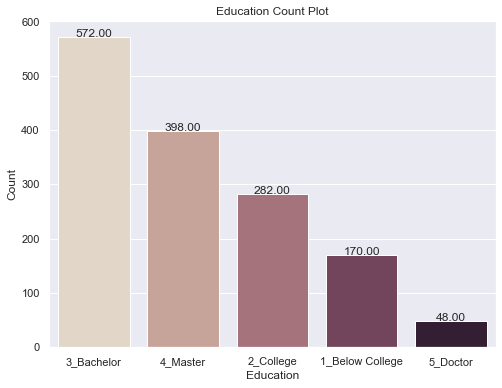

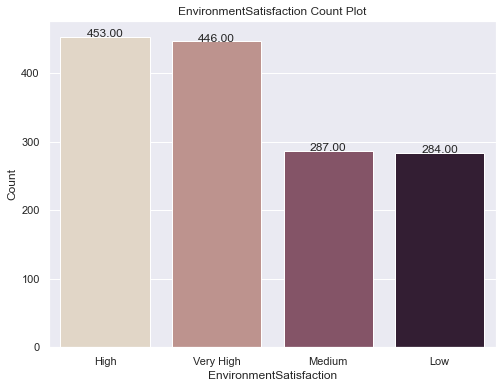

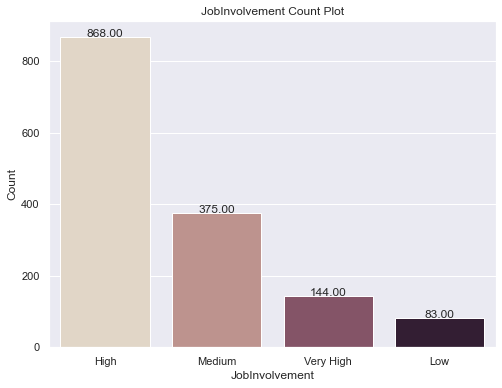

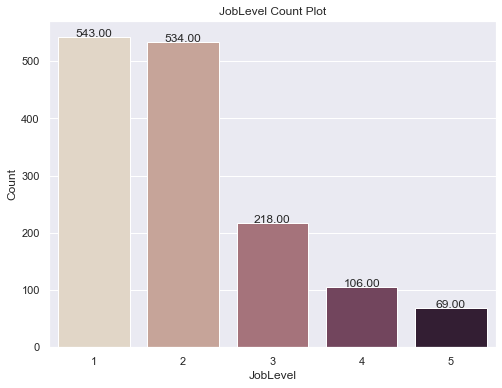

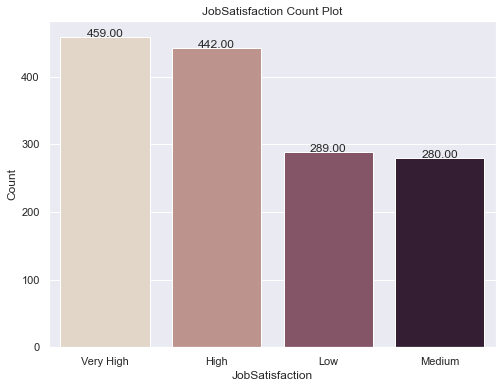

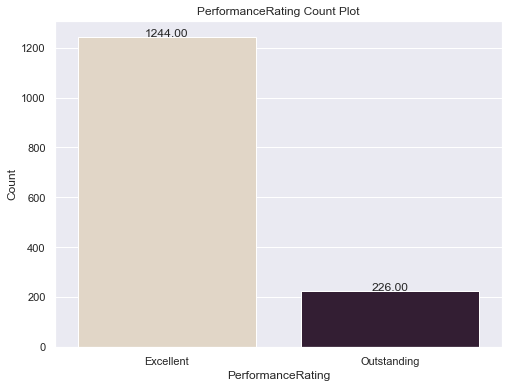

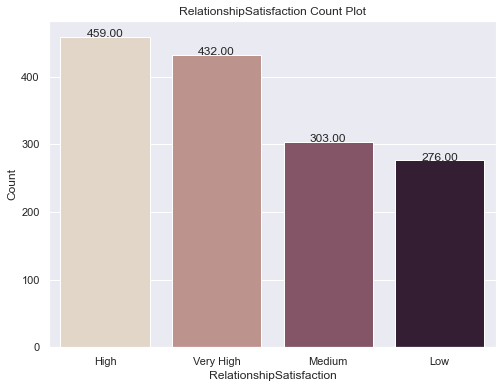

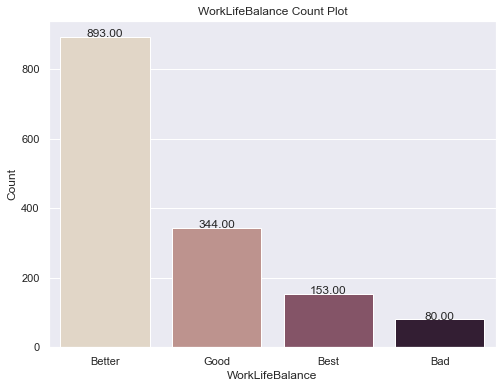

In [330]:
# Visualize Ord_num_cols
for col in Ord_Num_cols_R:
    fig, ax = plt.subplots(figsize = (8,6))
    sns_t = sns.countplot(x = col, data = Ord_Num_cols_R, palette = 'ch:.25'
                         , order = Ord_Num_cols_R[col].value_counts().index)
    plt.title (col + " Count Plot", fontdict={'fontsize':12})
    plt.xlabel(col)
    plt.ylabel("Count")
    show_values_on_bar(sns_t)

    plt.show()

**Ratio Variables**

In [436]:
# Get the summary statistics
# Because Monthlyrate, HourlyRate and DailyRate have the same information. So 2 variables (HourlyRate and DailyRate) are redundant
Ratio_Num_cols = HR_Dict.select_dtypes(np.number).columns.drop(['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel'
                       ,'JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance', 'EmployeeNumber'
                        , 'HourlyRate','DailyRate'])
Ratio_Num_cols

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [437]:
HR_Dict[[col for col in Ratio_Num_cols]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.5,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


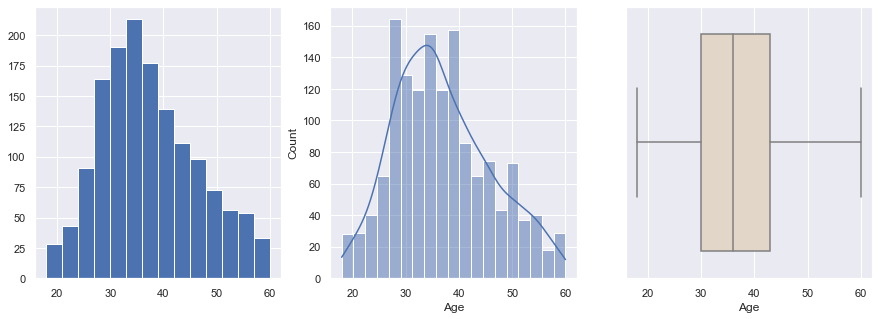

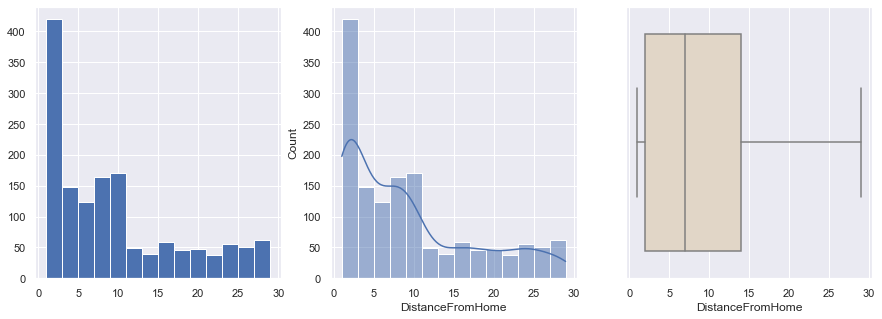

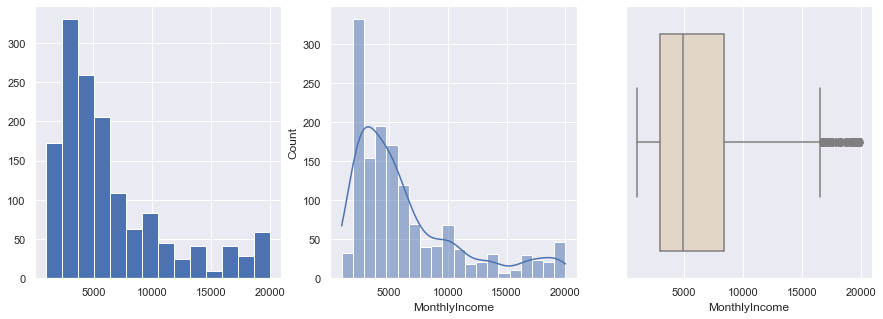

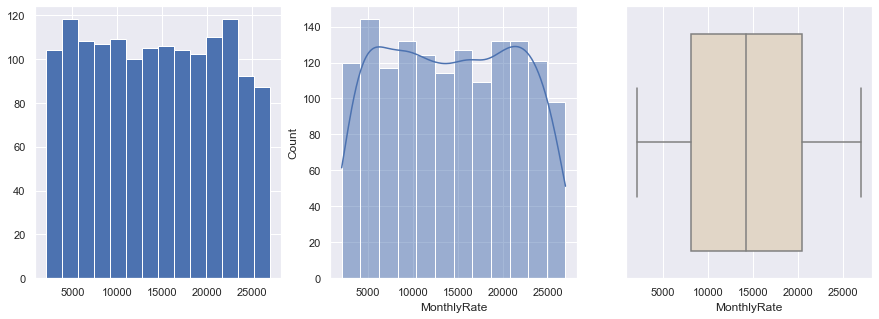

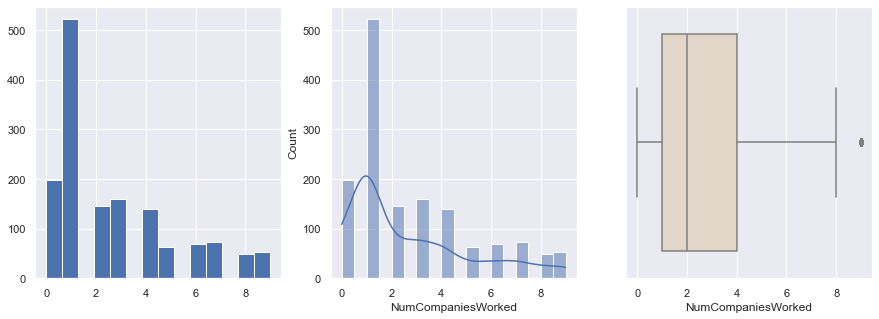

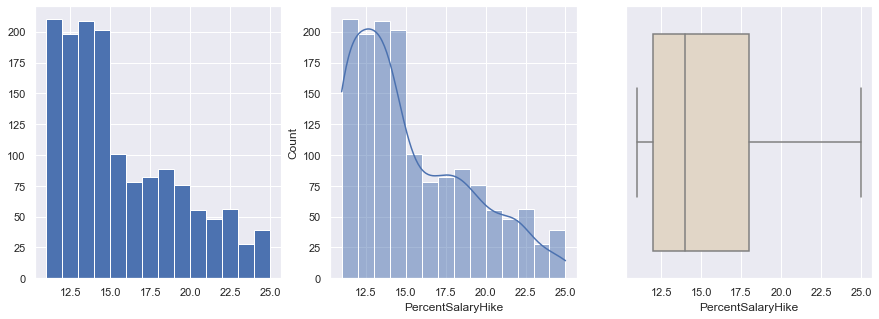

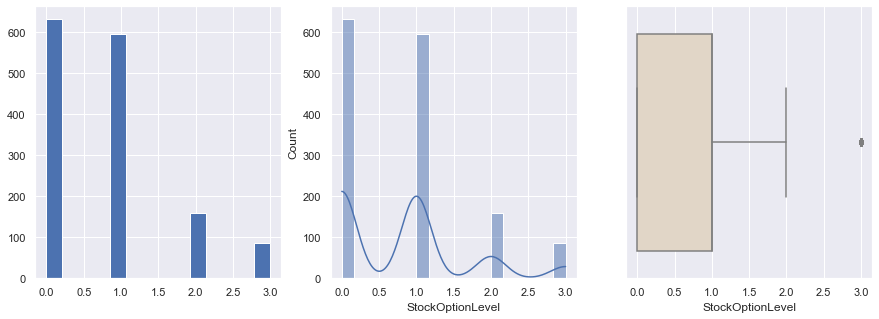

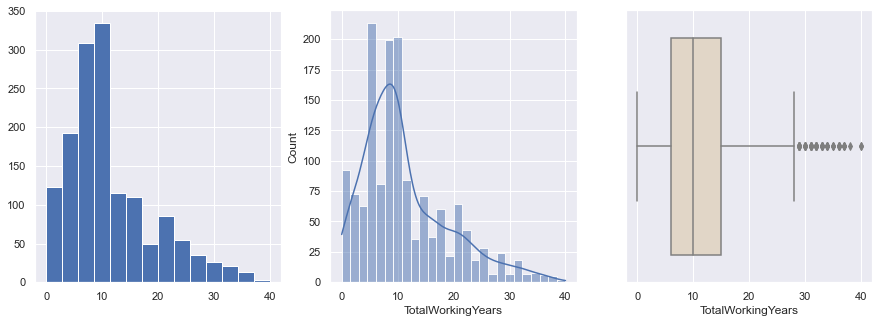

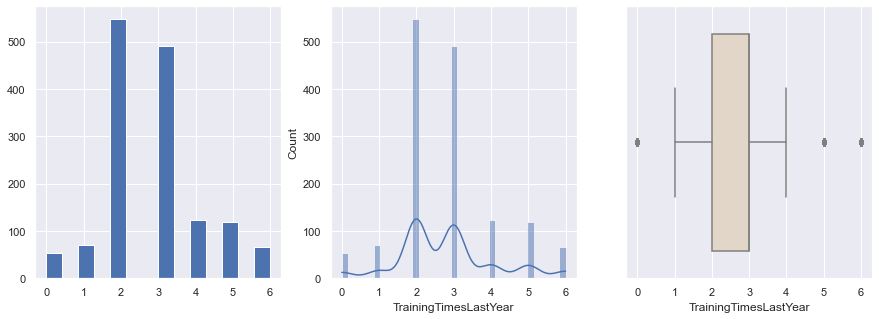

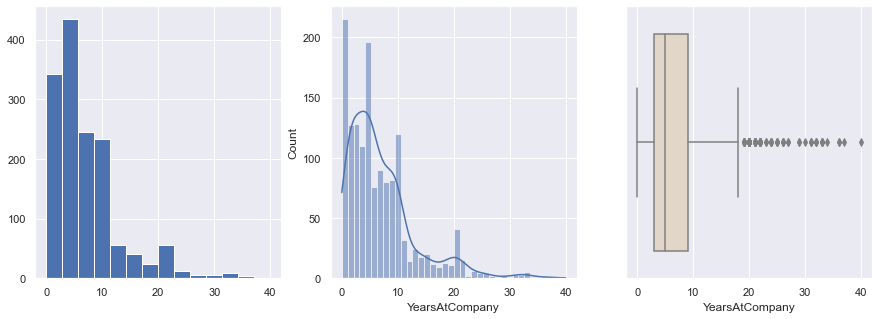

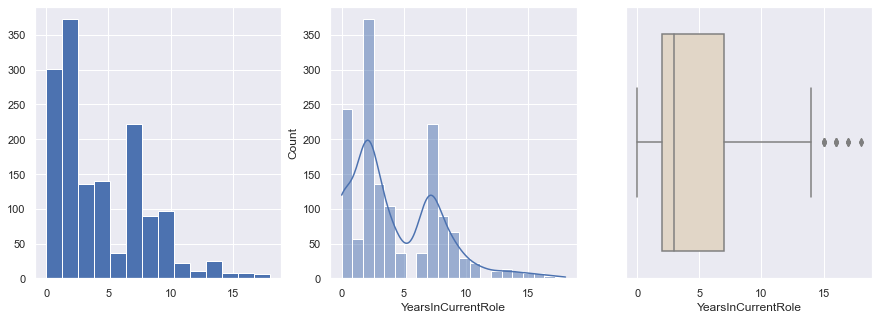

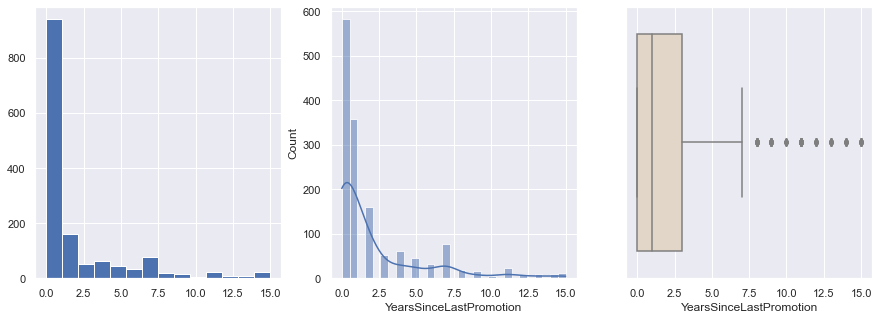

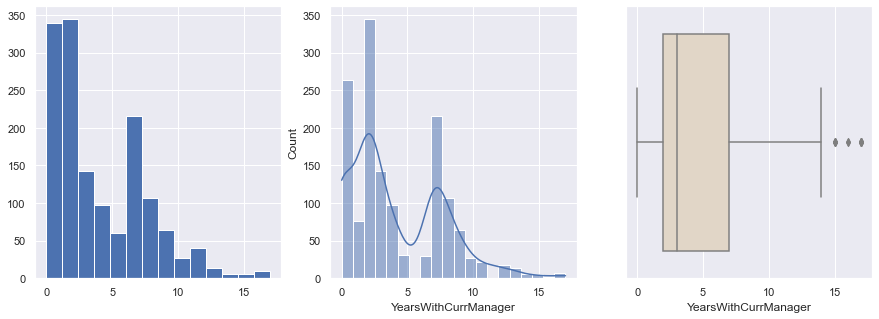

In [438]:
# Use seaborn to create a distribution plot
# ,  which includes a histogram, a kernel dinsity estimation (KDE), and a rug plot:

for col in Ratio_Num_cols:
    fig, axs = plt.subplots(ncols = 3, figsize = (15,5))
    HR_Dict[col].hist(ax=axs[0], bins = 14)
    #sns.distplot(HR_Dict[col], rug= True, ax =axs[1])
    sns.histplot(HR_Dict[col], ax =axs[1], kde = True )
    sns.boxplot(x = col, data = HR_Dict, palette = 'ch:.25', ax =axs[2])
    plt.show()

**Comments:**

From the dataset, it is clear to find some characteristic features as belows:
> * Age distribution is slightly right-skewed. The avg age is 37 and the majoriy of employees are between 30-42 year olds.
* Some variables have the right-skewed distribution such as DistinceFromHome/MonthlyIncome/YearsWithCurrManager...
* Some features have outliers to be concerned and need to collect more data in detail (MonthlyIncome/NumCompaniesWork/TotalWorkingYears/YearAtCompany/YearsInCurrentRole/YearsSinceLastPromotion/YearsWithCurrManager)
* The bulk of employees have long years of experience (around 6 -10 years).
* Most have working at the company for 10 years or less.
* The time since the last promotion is less than 2 years.
* There are 2 groups of employees which have lest than 5 years and which have 7-9 years=> there is a anomaly gap in the rank 5 - 7 years 

##### **3.2 Biavariate Analysis**

**Categorical variables**

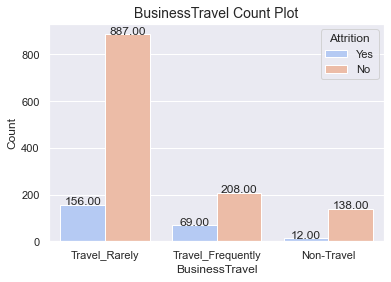

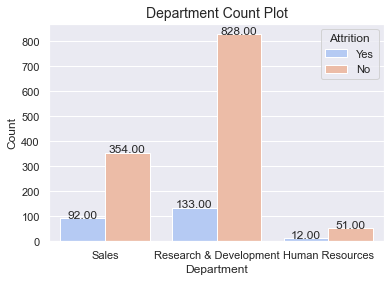

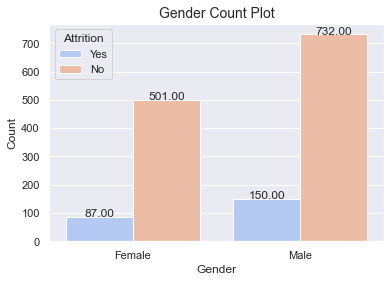

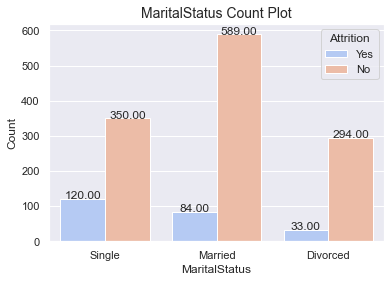

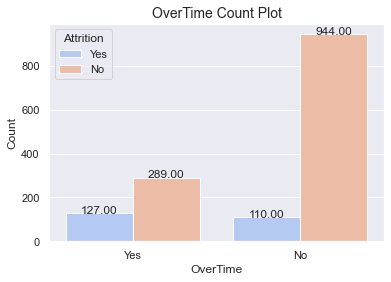

In [370]:
Cate_cols_2 = Cate_cols.drop(['EducationField','JobRole','Attrition'])

# Visualize Cate_cols_2
for col in Cate_cols_2:
    sns_t = sns.countplot(x = col,hue = 'Attrition', data = HR_Dict, palette = 'coolwarm')
    plt.title (col + " Count Plot", fontdict={'fontsize':14})
    plt.xlabel(col)
    plt.ylabel("Count")
    show_values_on_bar(sns_t)

    plt.show()

**Ordinal Variables**

In [376]:
# Convert numeric-like values to categorical value
Education = { 1: '1_Below College', 2: '2_College', 3:'3_Bachelor',  4: '4_Master', 5: '5_Doctor'}
EnvironmentSatisfaction = {1 :'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
JobInvolvement = {1:'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
JobSatisfaction = {1:'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
PerformanceRating = {1:'Low', 2: 'Good',3: 'Excellent', 4: 'Outstanding'}
RelationshipSatisfaction = {1:'Low', 2: 'Medium',3: 'High', 4: 'Very High'}
WorkLifeBalance = {1:'Bad', 2: 'Good',3: 'Better', 4: 'Best'}
                               
HR_Dict_R = HR_Dict.copy()
HR_Dict_R.Education = [Education[item] for item in HR_Dict_R.Education] 
HR_Dict_R.EnvironmentSatisfaction = [EnvironmentSatisfaction[item] for item in HR_Dict_R.EnvironmentSatisfaction] 
HR_Dict_R.JobInvolvement = [JobInvolvement[item] for item in HR_Dict_R.JobInvolvement]  
HR_Dict_R.JobSatisfaction = [JobSatisfaction[item] for item in HR_Dict_R.JobSatisfaction]  
HR_Dict_R.PerformanceRating = [PerformanceRating[item] for item in HR_Dict_R.PerformanceRating]  
HR_Dict_R.RelationshipSatisfaction = [RelationshipSatisfaction[item] for item in HR_Dict_R.RelationshipSatisfaction]  
HR_Dict_R.WorkLifeBalance = [WorkLifeBalance[item] for item in HR_Dict_R.WorkLifeBalance]  
HR_Dict_R

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2_College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1_Below College,Life Sciences,2,High,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2_College,Other,4,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4_Master,Life Sciences,5,Very High,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1_Below College,Medical,7,Low,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2_College,Medical,2061,High,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1_Below College,Medical,2062,Very High,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3_Bachelor,Life Sciences,2064,Medium,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3_Bachelor,Medical,2065,Very High,...,Excellent,Very High,0,17,3,Good,9,6,0,8


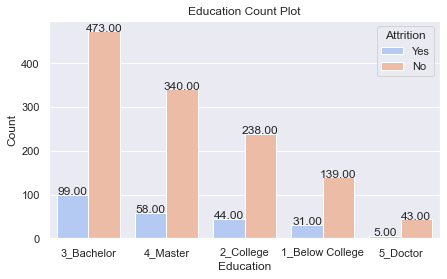

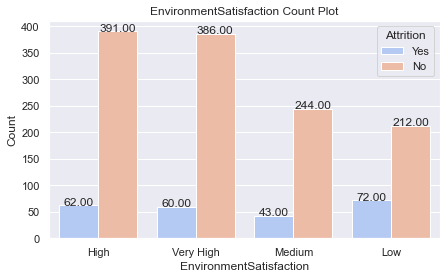

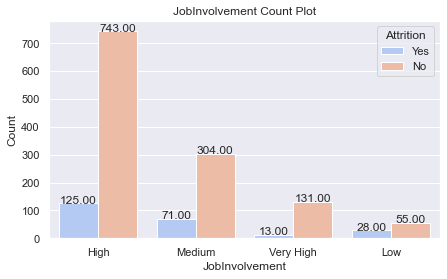

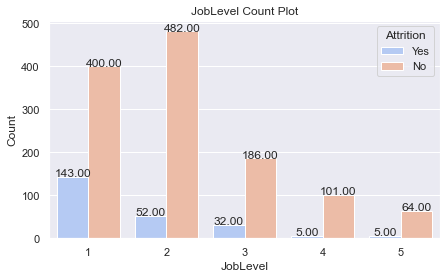

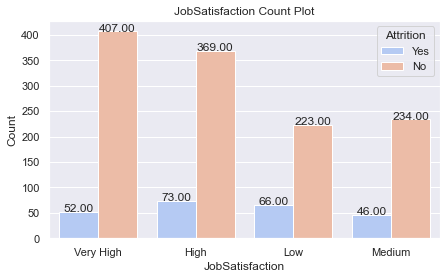

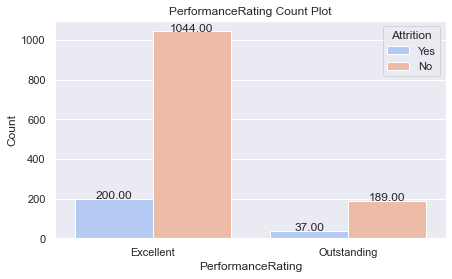

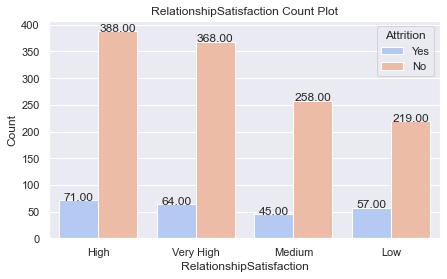

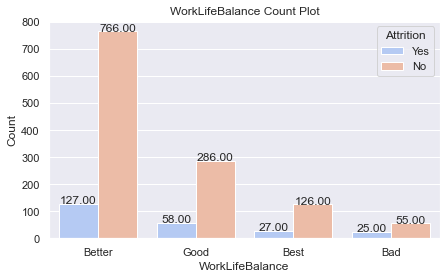

In [379]:
# Visualize Ord_num_cols
for col in Ord_Num_cols_R:
    fig, ax = plt.subplots(figsize = (7,4))
    sns_t = sns.countplot(x = col,hue = 'Attrition', data = HR_Dict_R, palette = 'coolwarm'
                         , order = Ord_Num_cols_R[col].value_counts().index)
    plt.title (col + " Count Plot", fontdict={'fontsize':12})
    plt.xlabel(col)
    plt.ylabel("Count")
    show_values_on_bar(sns_t)

    plt.show()

**Ratio Variables**

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


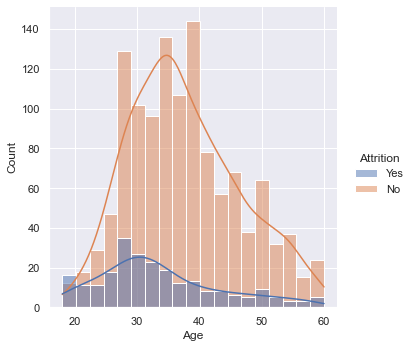

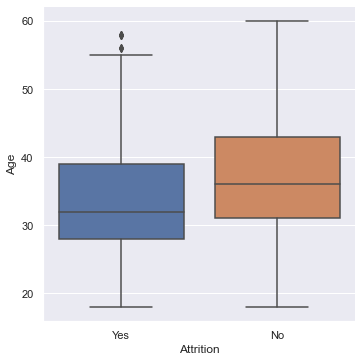

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


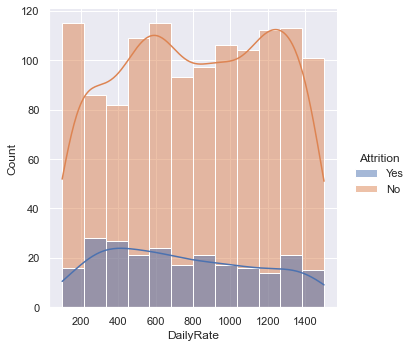

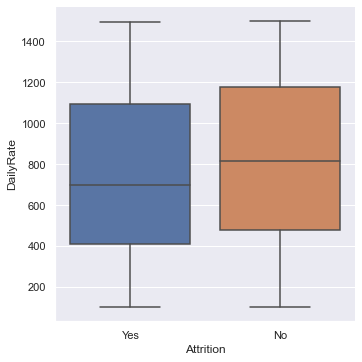

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


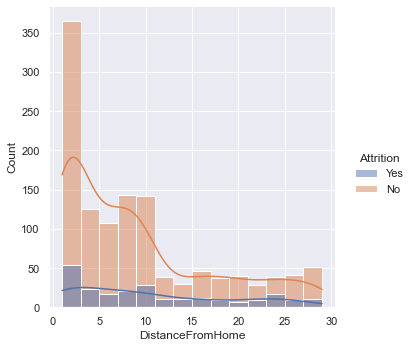

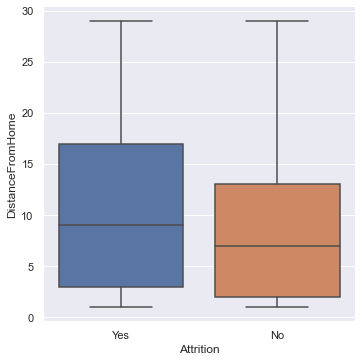

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


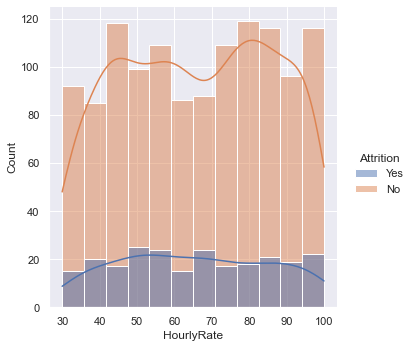

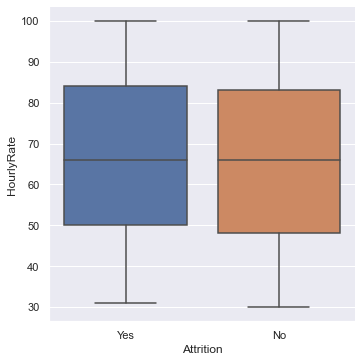

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


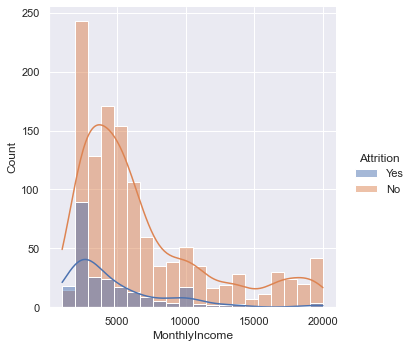

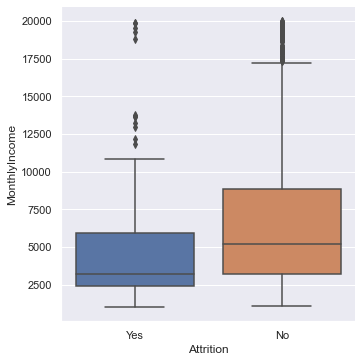

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


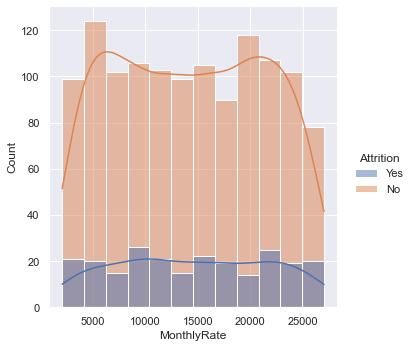

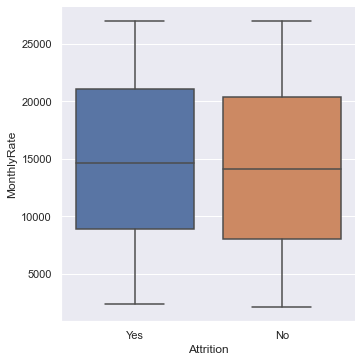

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


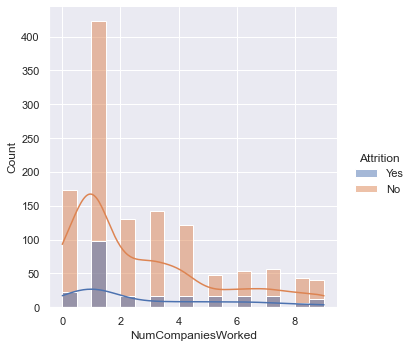

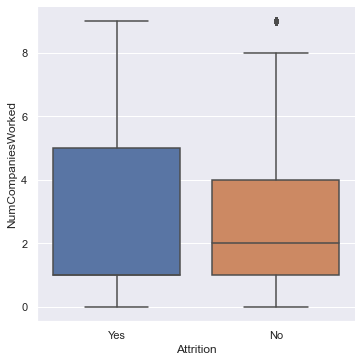

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


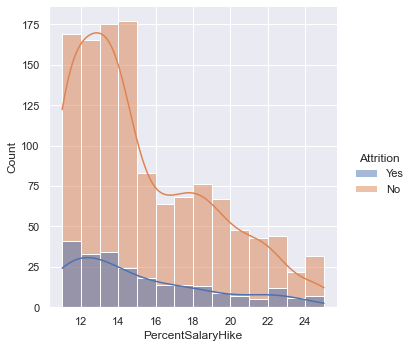

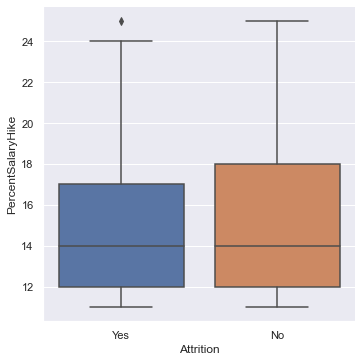

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


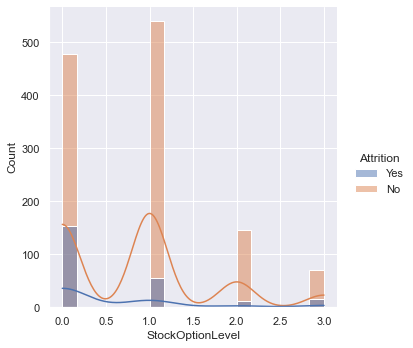

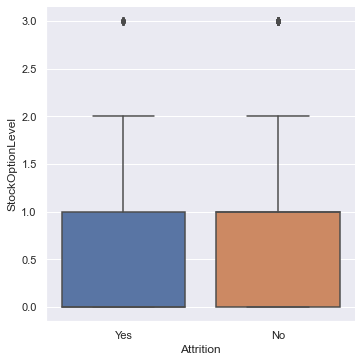

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


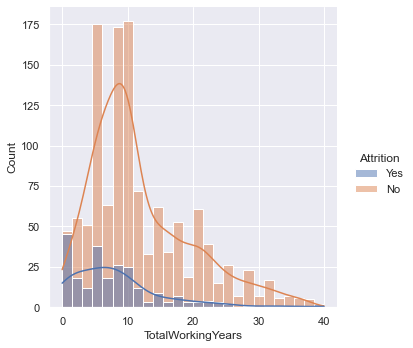

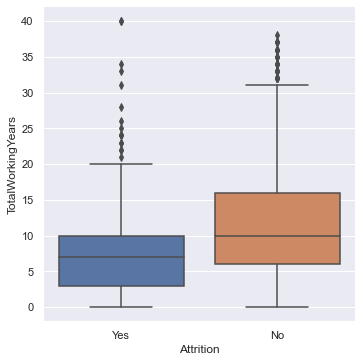

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


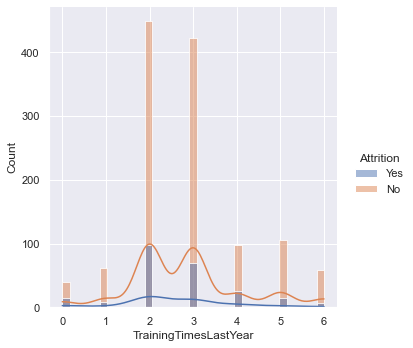

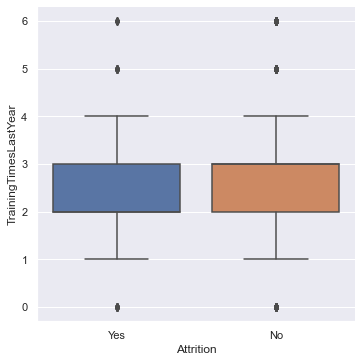

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


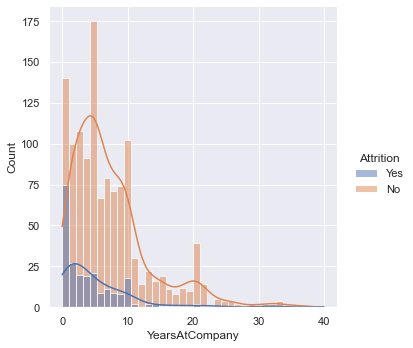

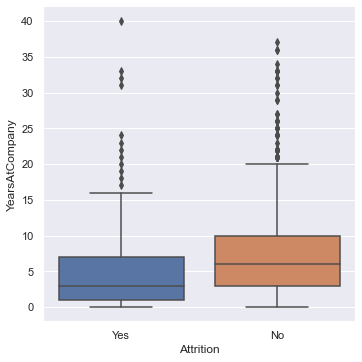

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


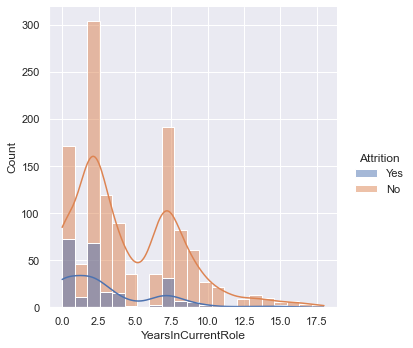

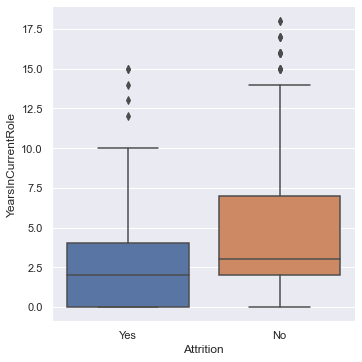

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


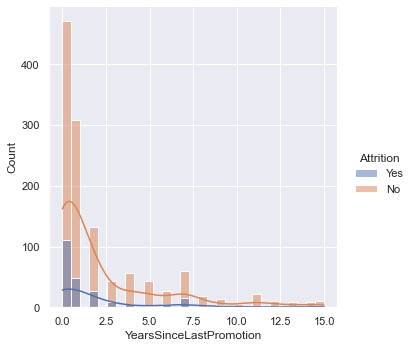

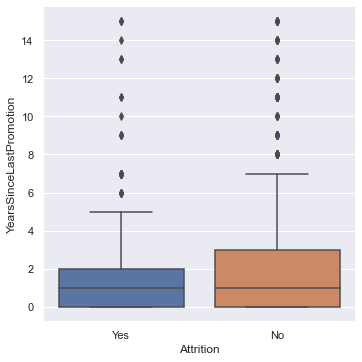

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


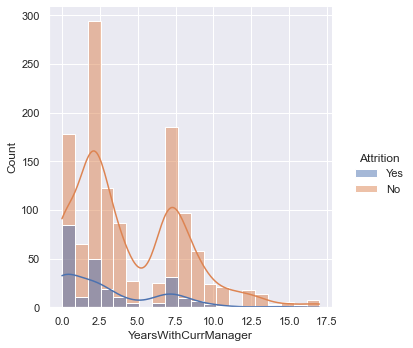

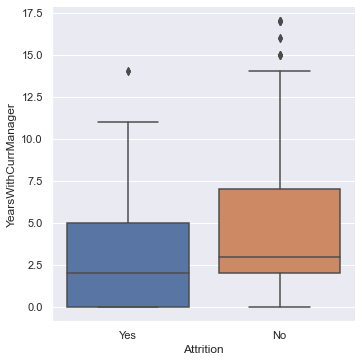

In [426]:
# Use seaborn to create a distribution plot
# ,  which includes a histogram, a kernel dinsity estimation (KDE), and a rug plot:

for col in Ratio_Num_cols:
    #fig, ax = plt.subplots(figsize = (7,4))
    sns.displot(HR_Dict, x=HR_Dict[col], hue='Attrition', ax=ax, kde = True )
    
    # boxplot 
    mask = HR_Dict.Attrition.isin(['Yes','No'])
    HR_Dict[mask].groupby('Attrition')[col].agg(['mean','std']) 
    sns.catplot(x='Attrition',y= col, data = HR_Dict[mask], kind = 'box', ax = ax) 
    plt.show()
    

##### **3.3 Mutivariate Analysis**

**Attrition VS Gender**

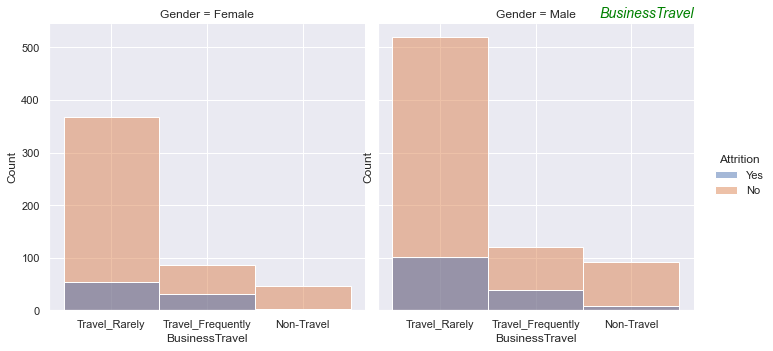

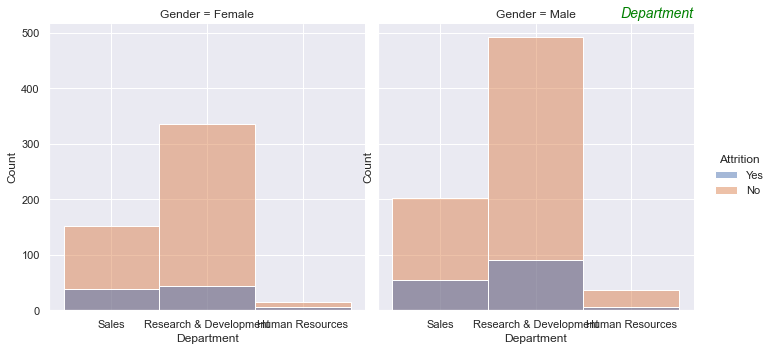

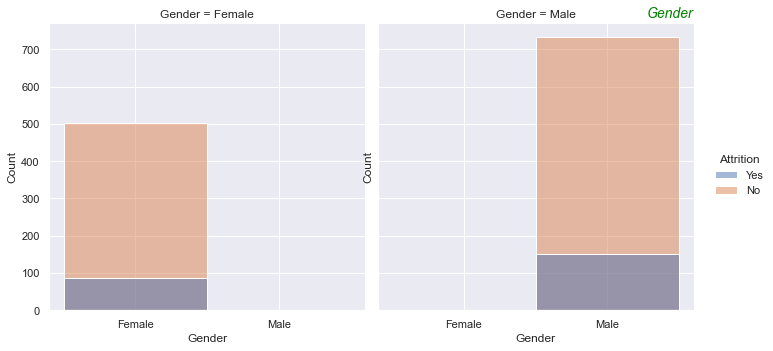

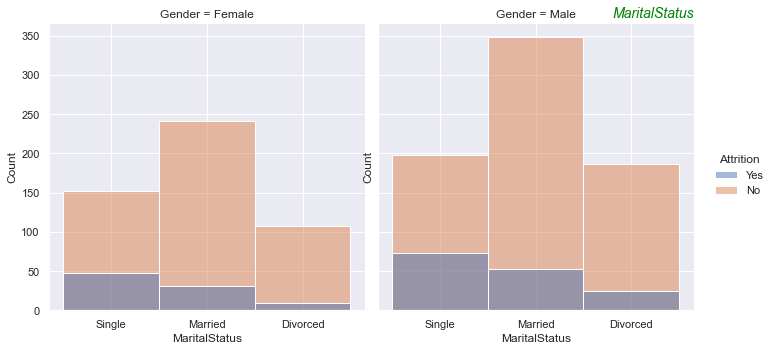

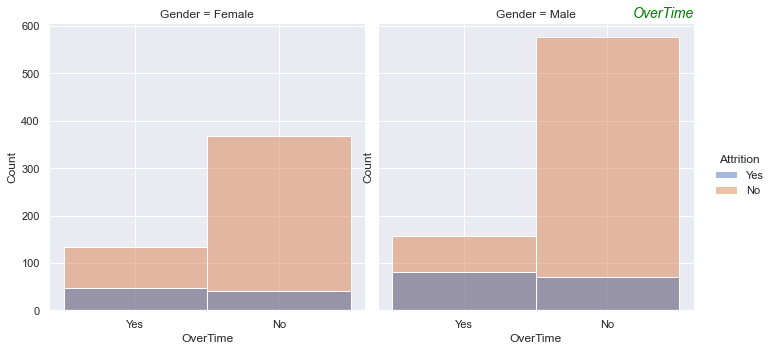

In [466]:
Cate_cols_2 = Cate_cols.drop(['EducationField','JobRole','Attrition'])

# Visualize Cate_cols_2
for col in Cate_cols_2:
    sns.displot(HR_Dict, x=col, col='Gender', hue='Attrition')
    plt.title (col , fontdict={'fontsize':14},loc="right",  fontstyle='oblique', color='green')
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.show()

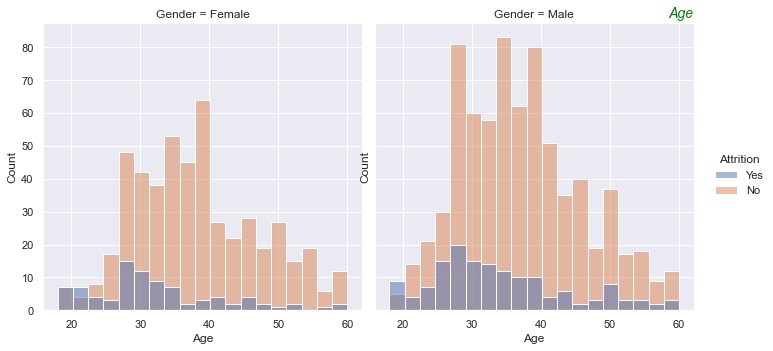

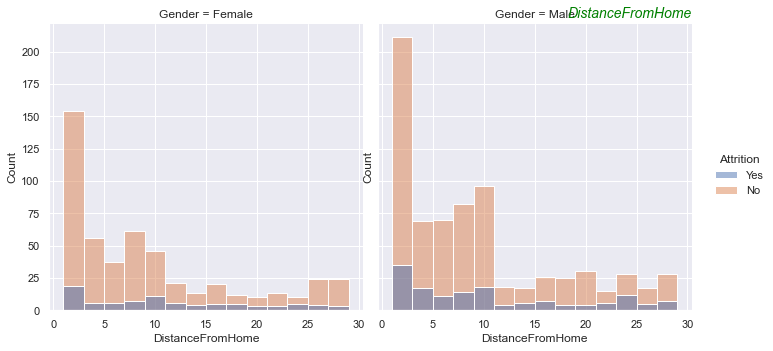

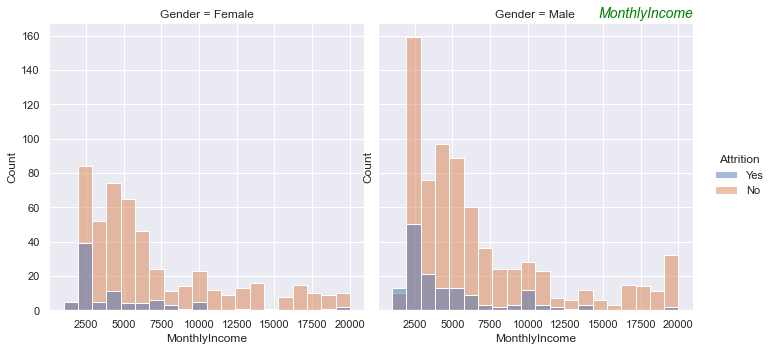

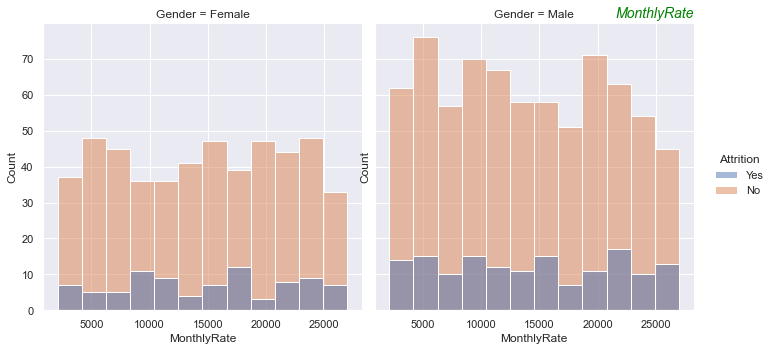

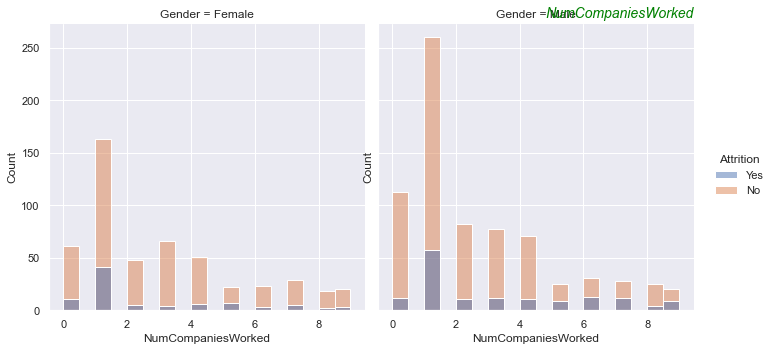

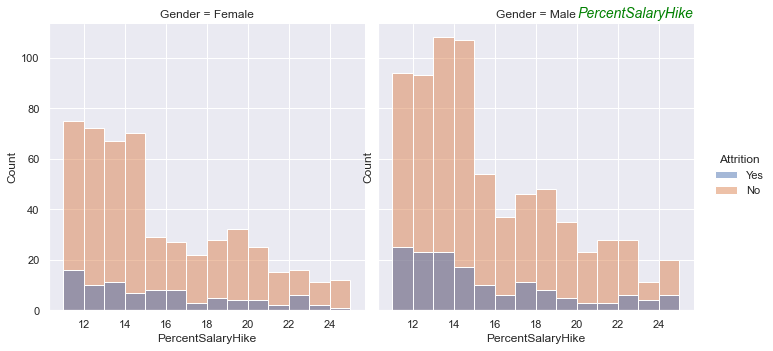

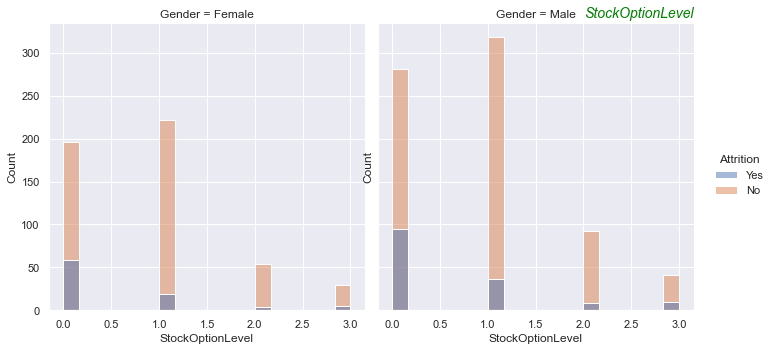

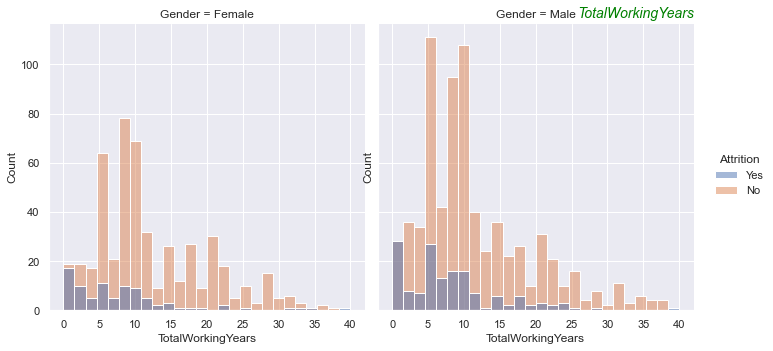

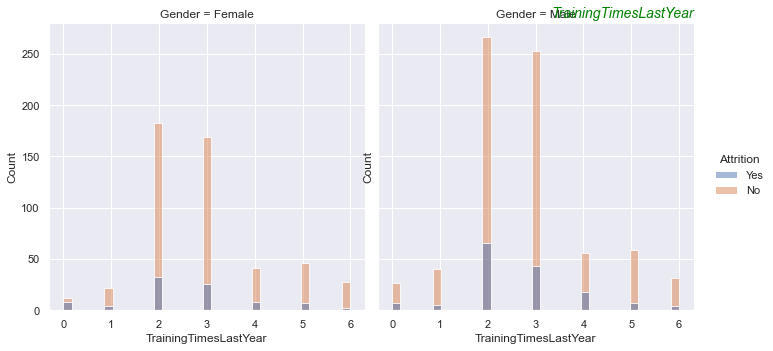

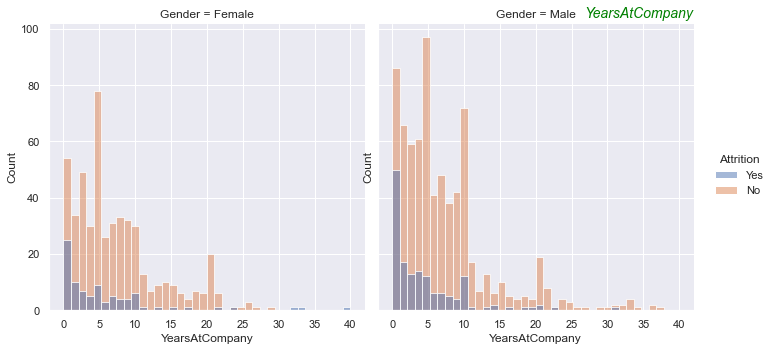

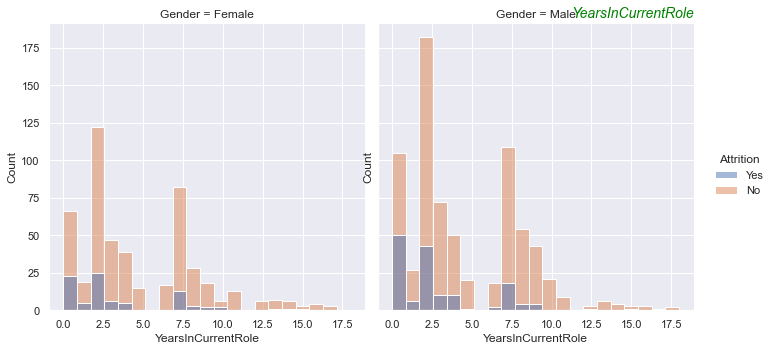

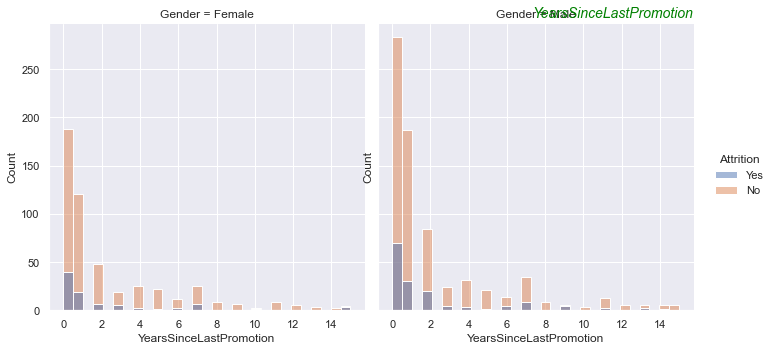

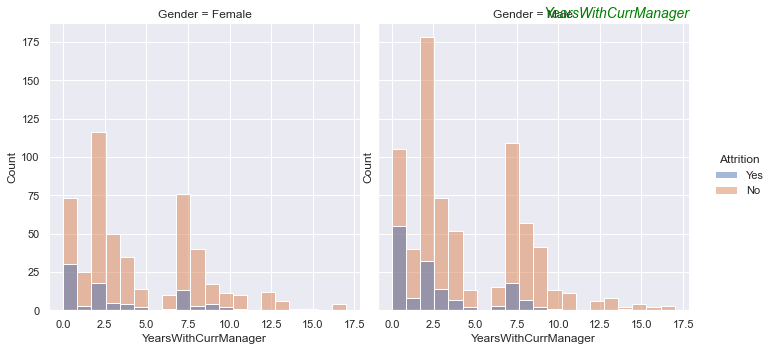

In [464]:
for col in Ratio_Num_cols:
    sns.displot(HR_Dict, x=col, col='Gender', hue='Attrition')
    plt.title (col , fontdict={'fontsize':14},loc="right",  fontstyle='oblique', color='green')
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.show()

**Comments:**

From the dataset, it is clear to find some characteristic features from Attrition group by Gender as belows:
> * Business_travel: mostly travel_rarely for both
* Dept: Sales = R&D (F) but R&D (M)
* MaritalStatus: Single for both
* Overtime: no considerable impact 
* Attrition Age: 28-34 (Female) and 26- 38 (Male)
* DistanceFromHome: : under 10 km for both 
* MonthlyIncome: 2500 (F) and 2500-5000 (M)
* NumCompaniesWorked: 1 for both
* TotalWorkingYears: under 1 year, 5 year (F), under 1 year and 5-10 (M)
* YearsAtCompany: 1, 5 year (F), 1, yar (M)
* YearsInCurrentRole/ YearsWithCurrManager : 1-2 year (F), 1,2,7 year (M)
* YearsSinceLastPromotion: < 2 years for both

**Attrition VS Education**

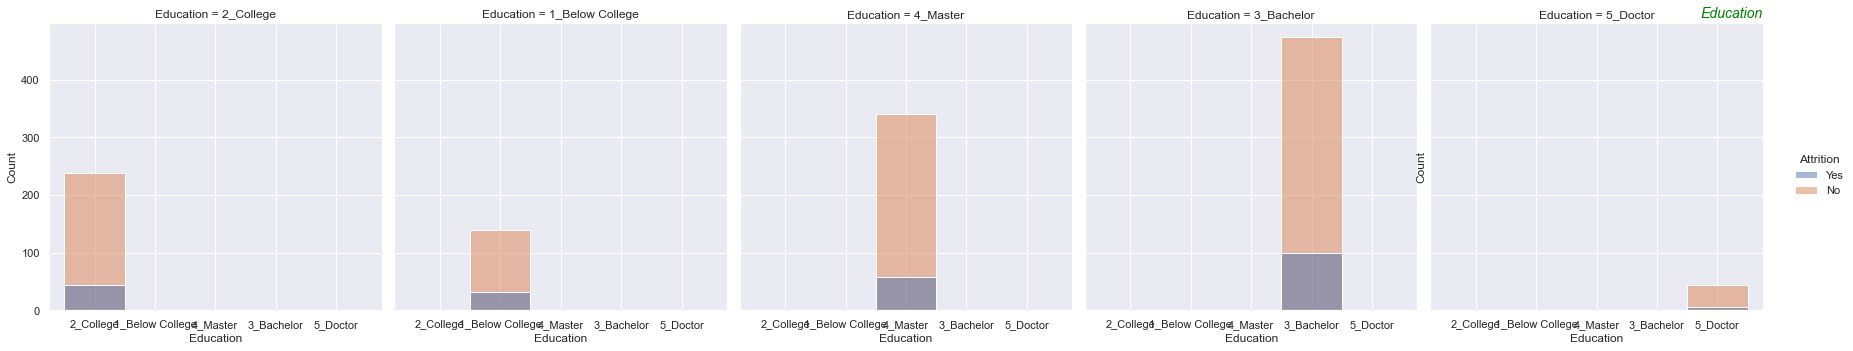

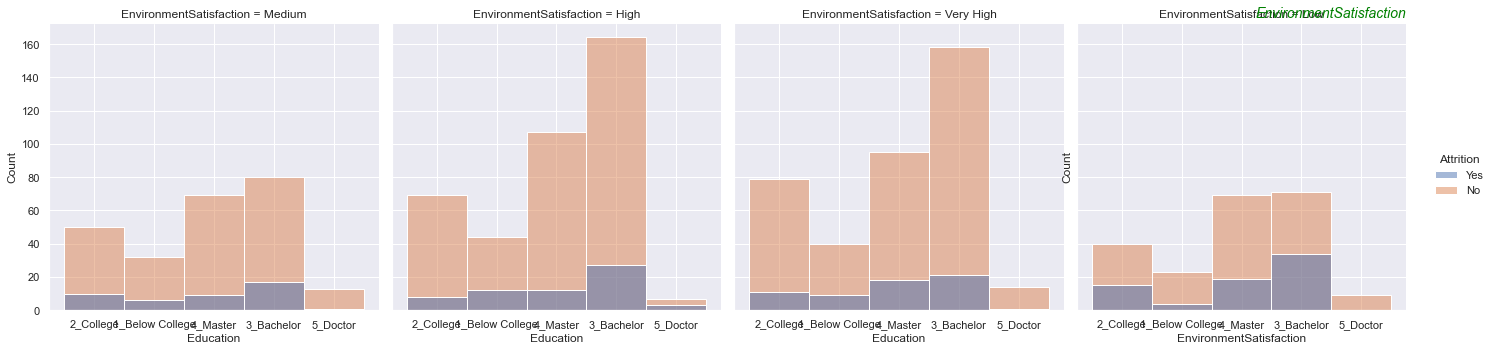

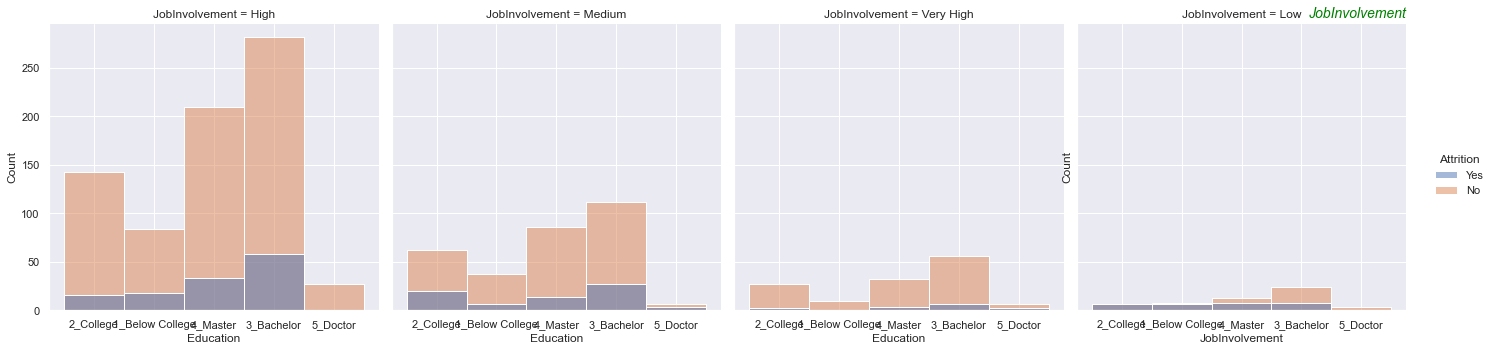

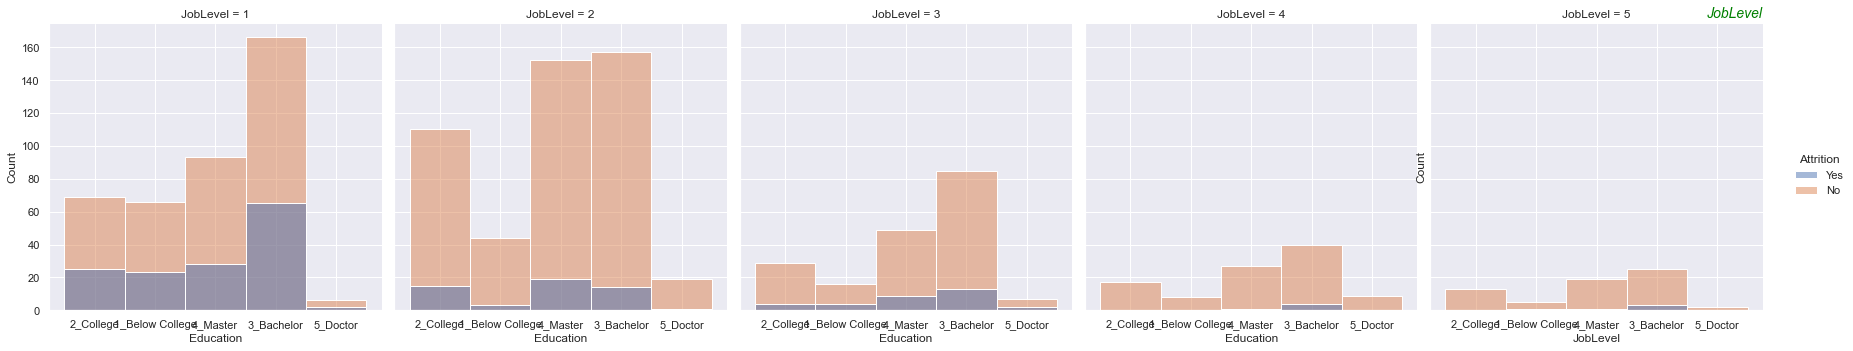

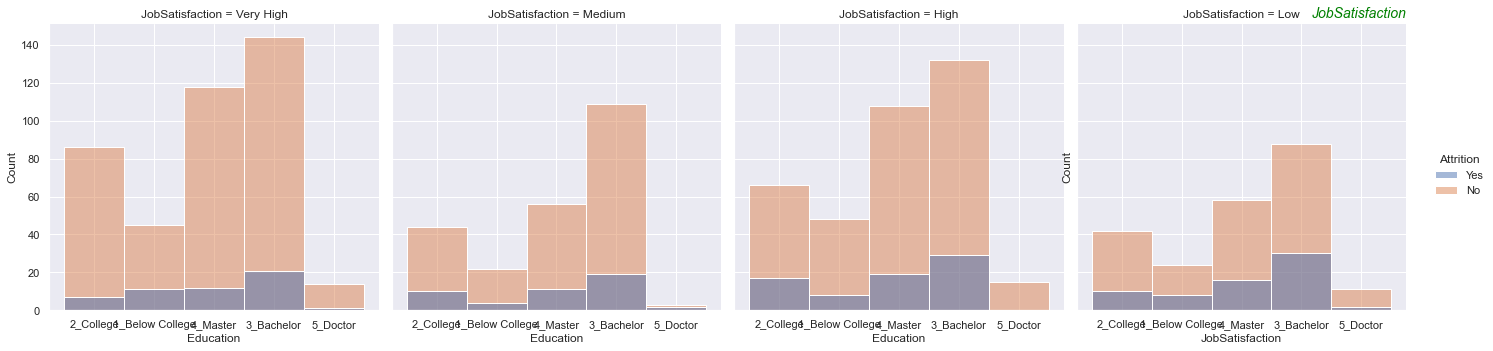

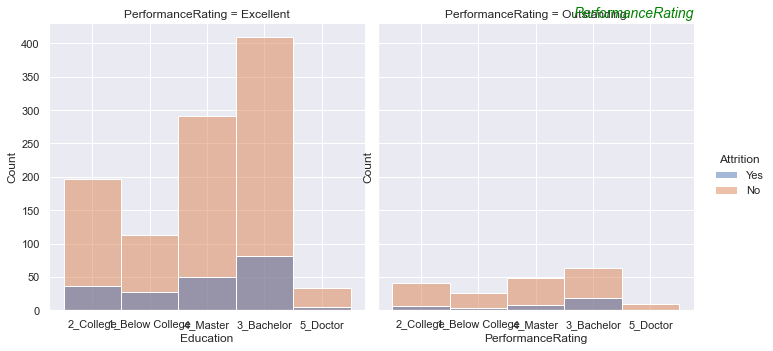

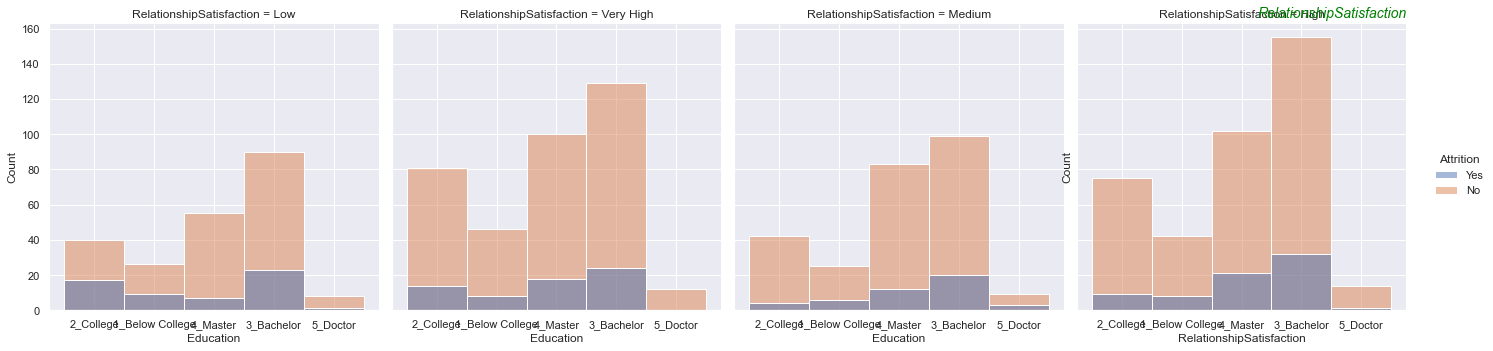

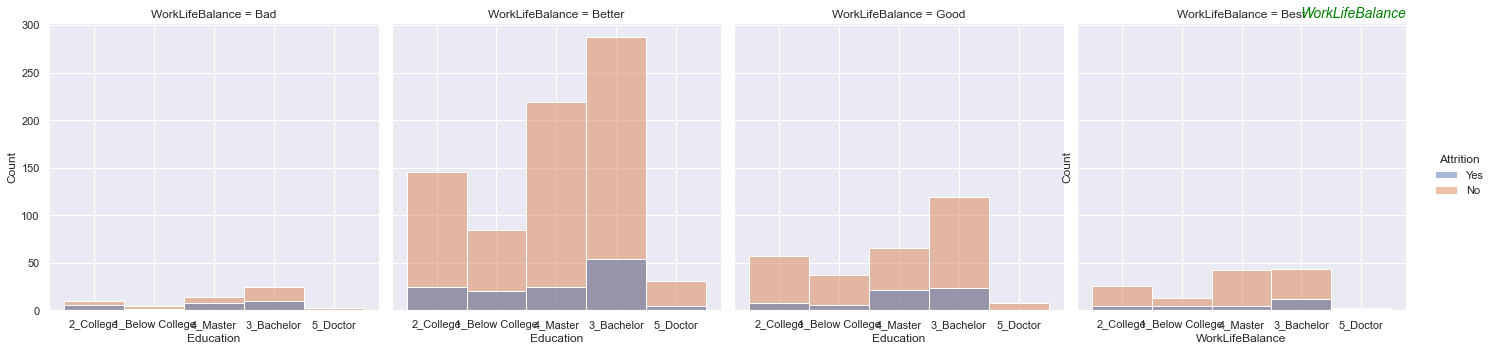

In [473]:
# Visualize Cate_cols_2
for col in Ord_Num_cols_R:
    sns.displot(HR_Dict_R, col=col, x='Education', hue='Attrition')
    plt.title (col , fontdict={'fontsize':14},loc="right",  fontstyle='oblique', color='green')
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.show()

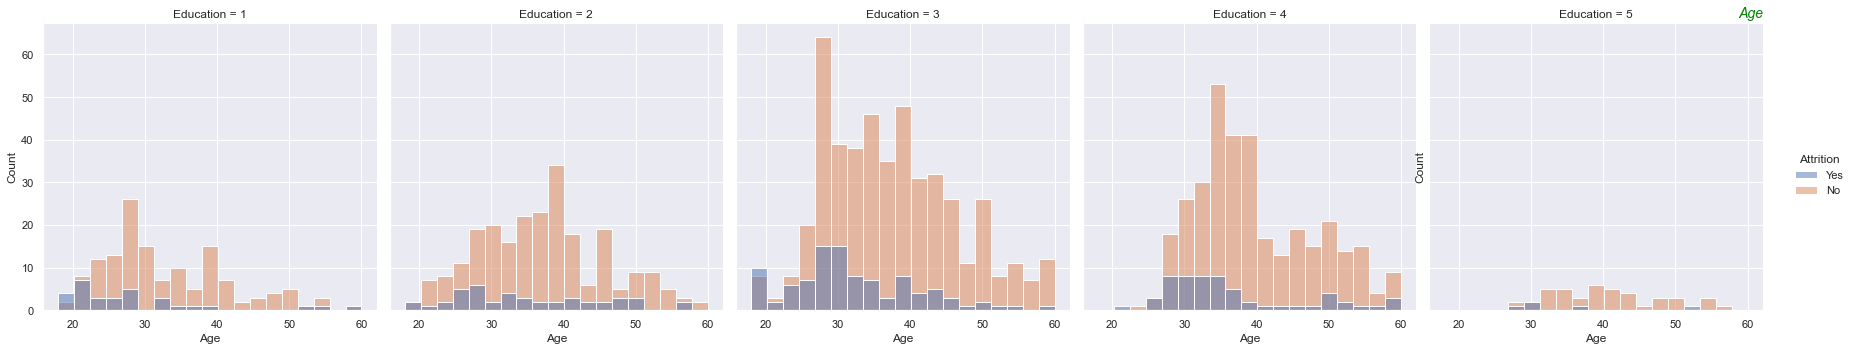

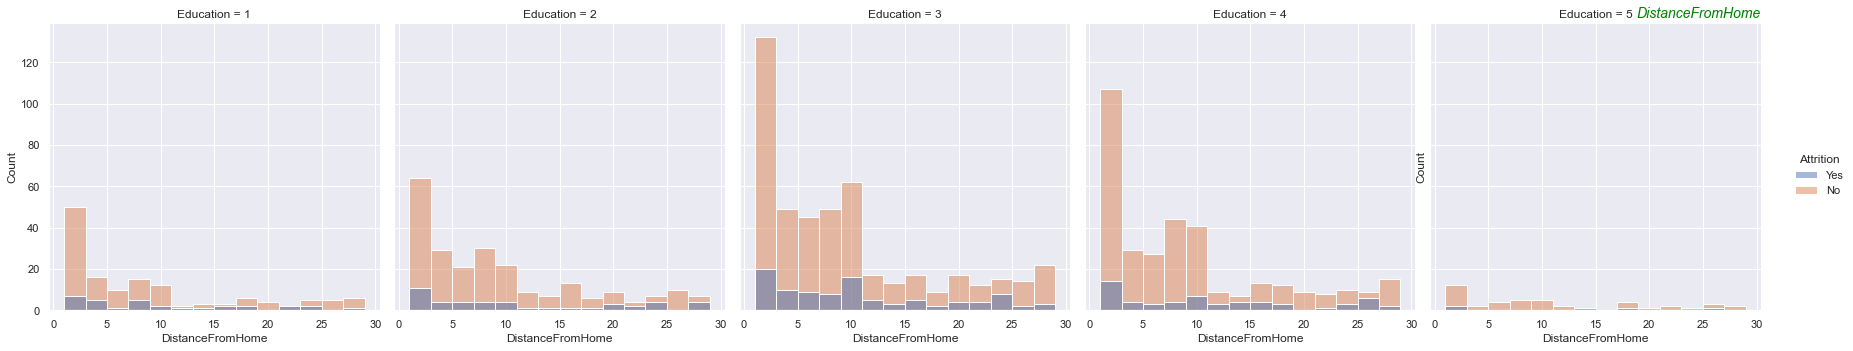

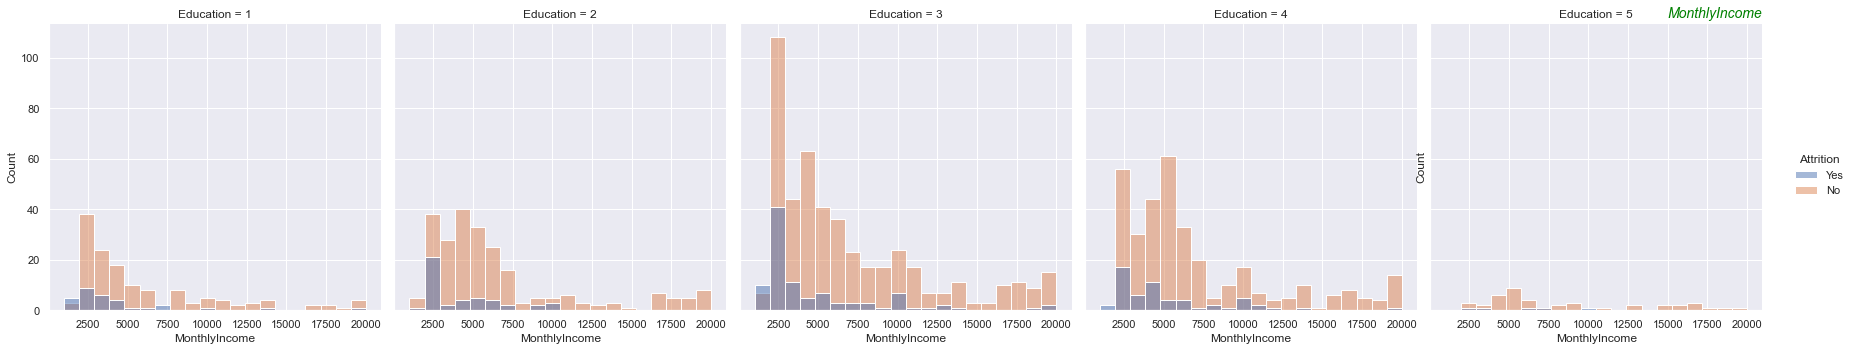

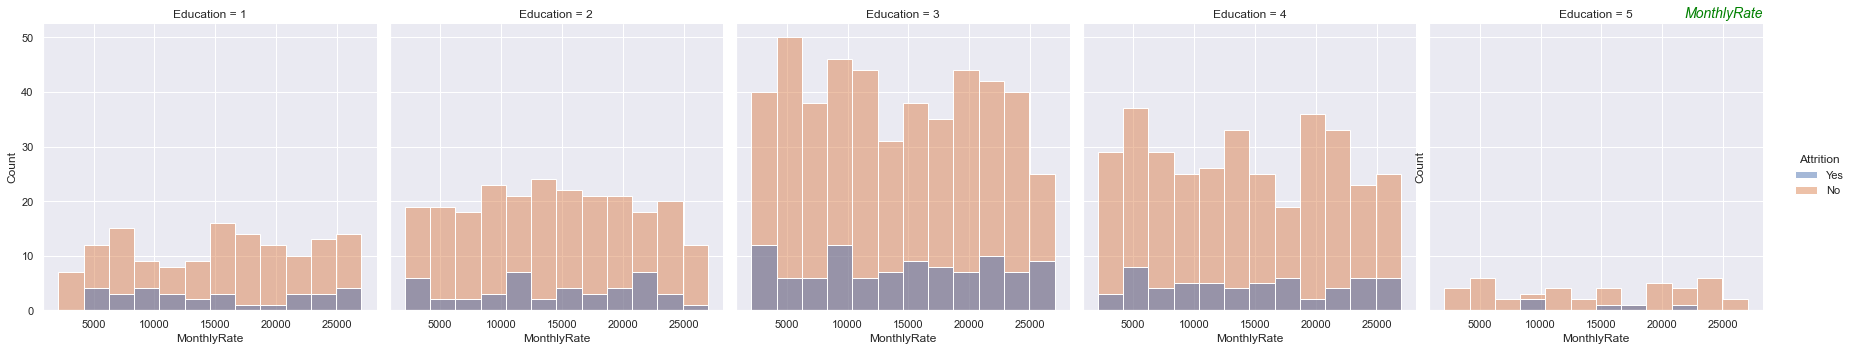

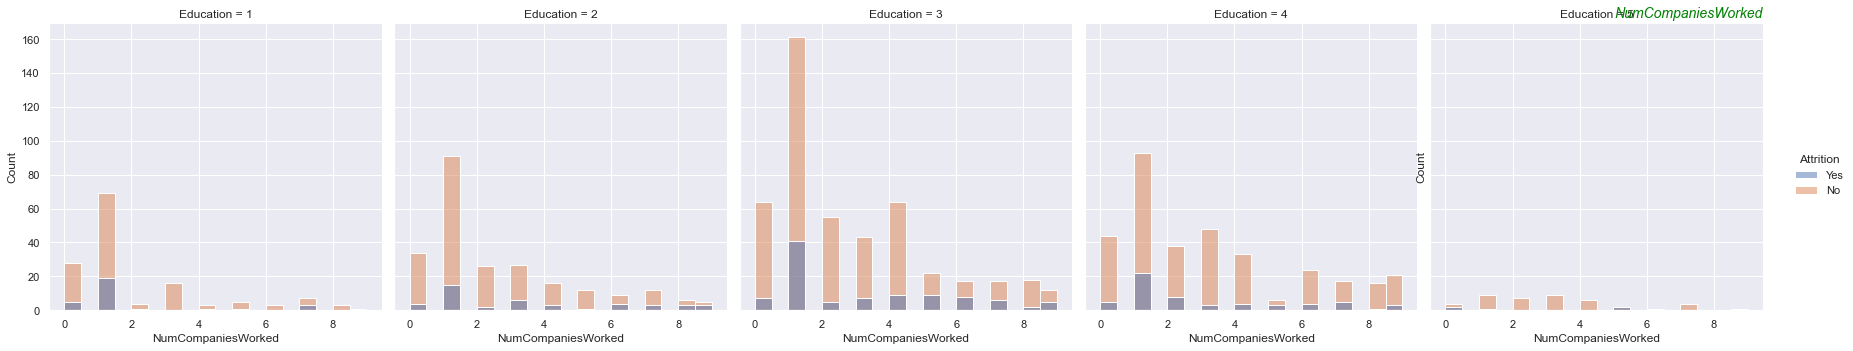

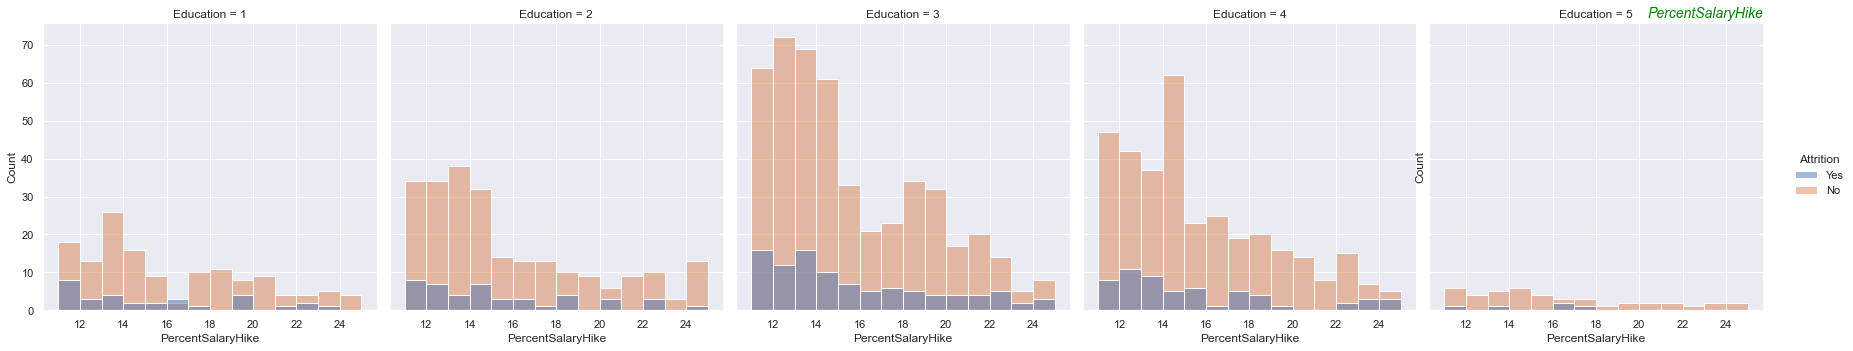

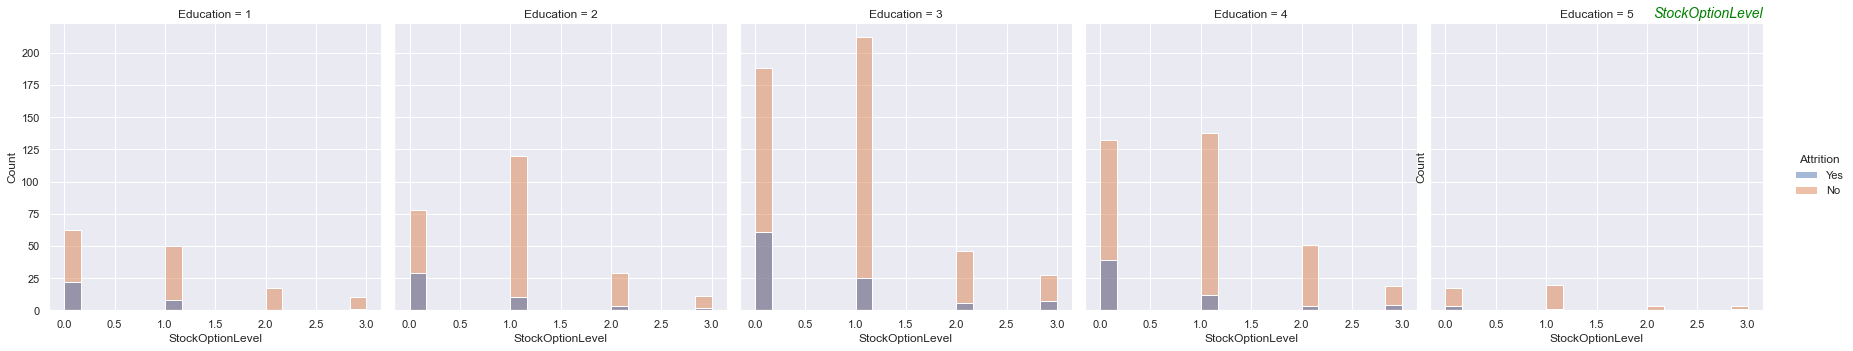

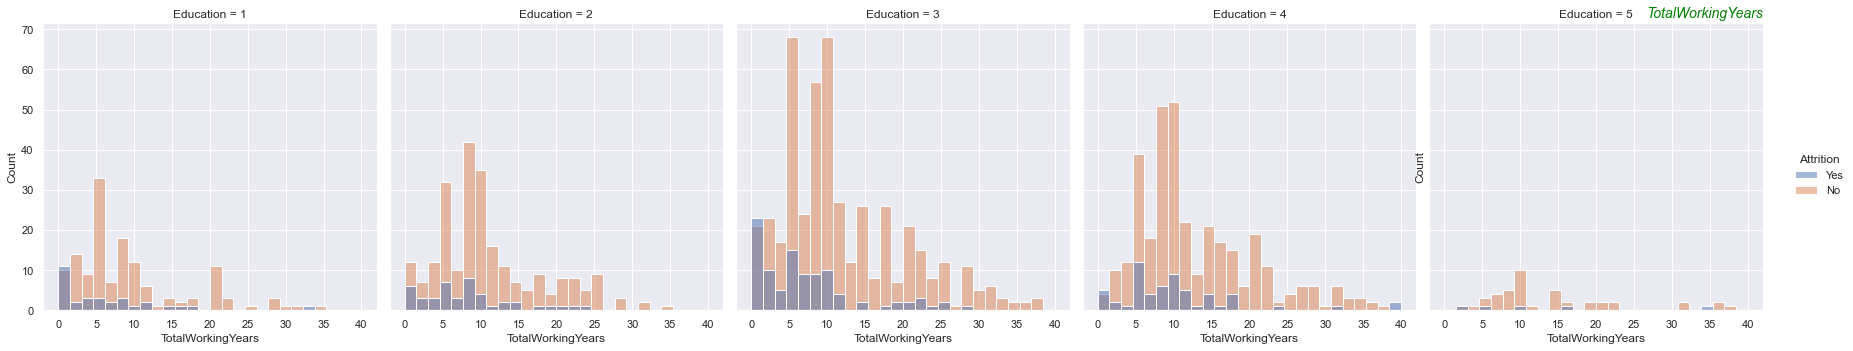

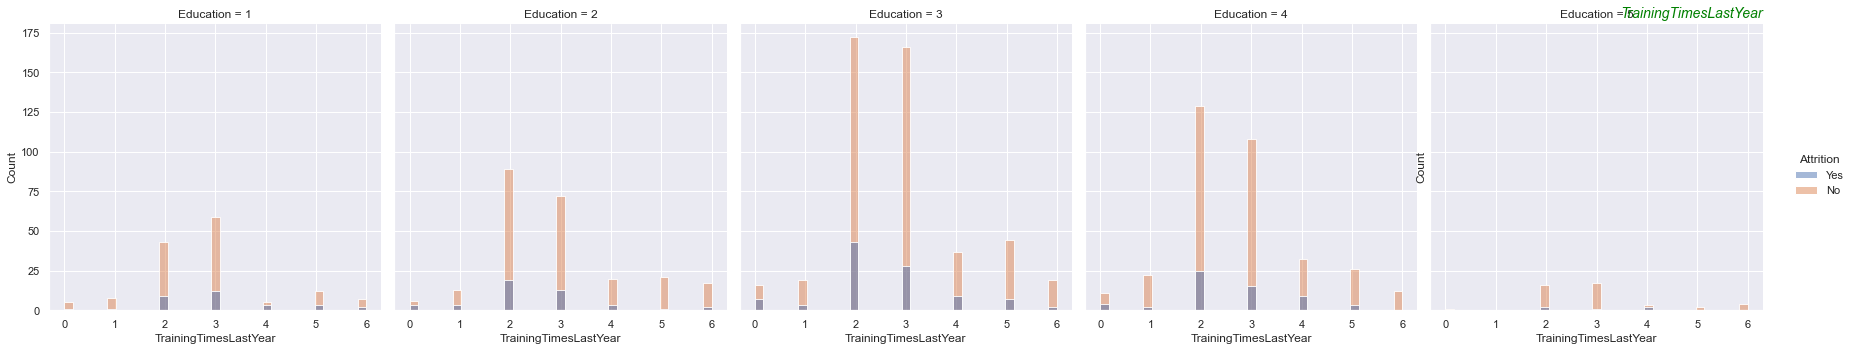

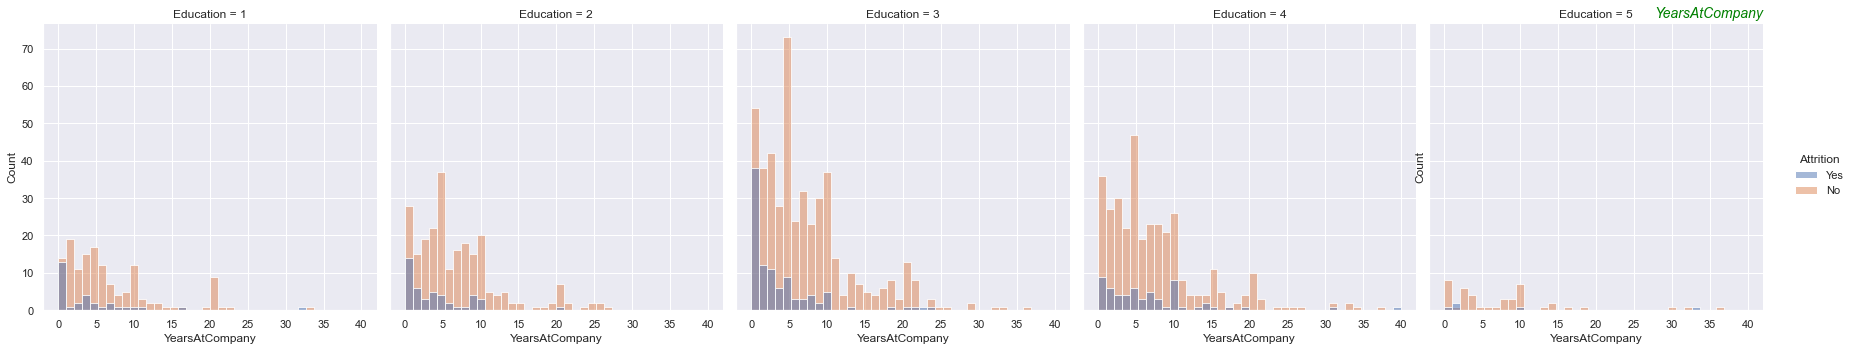

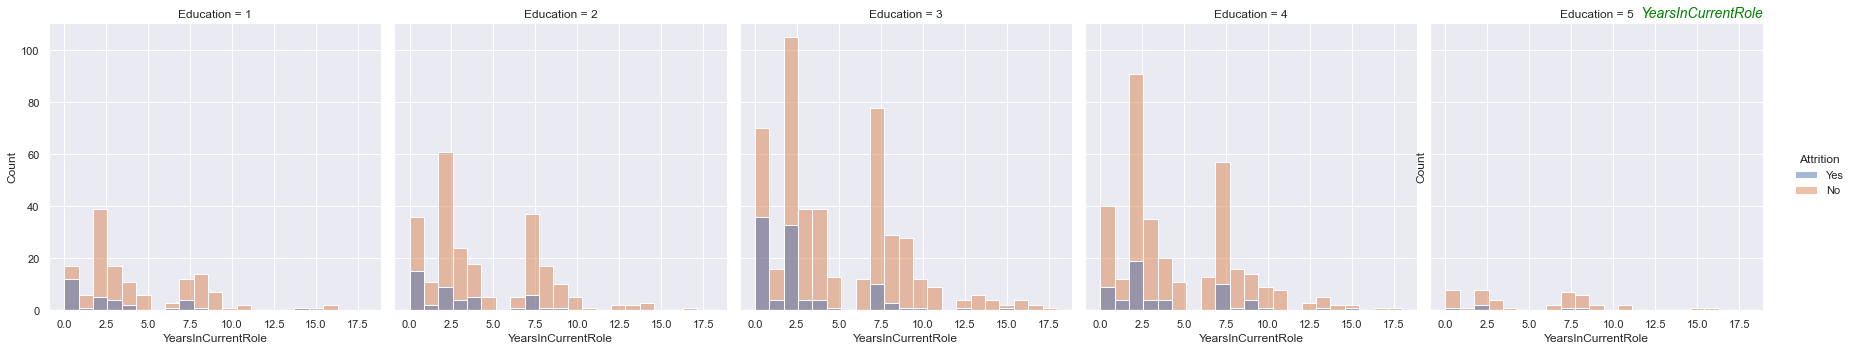

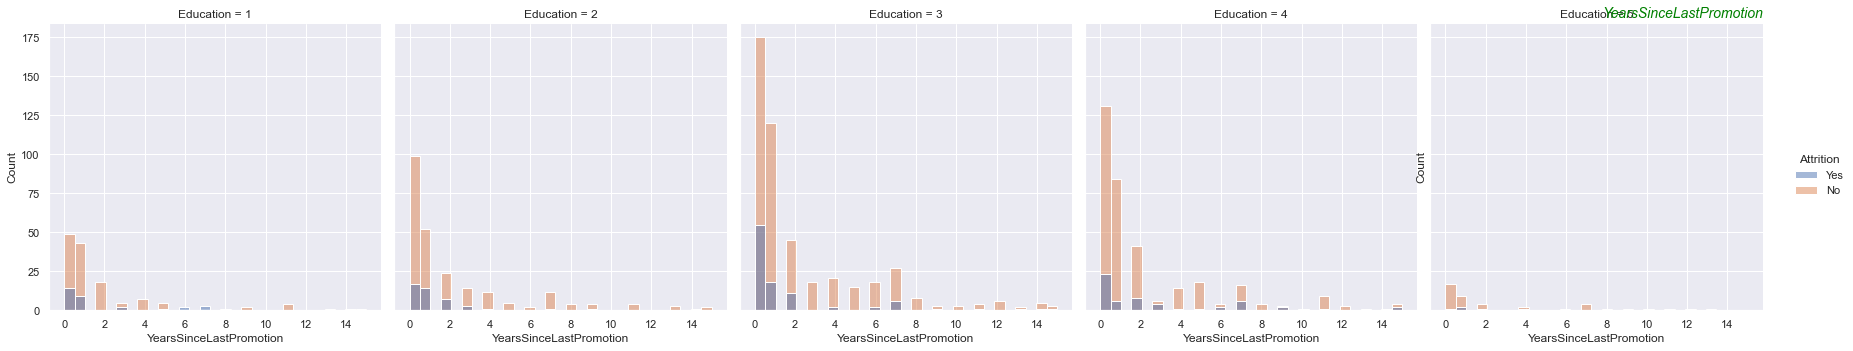

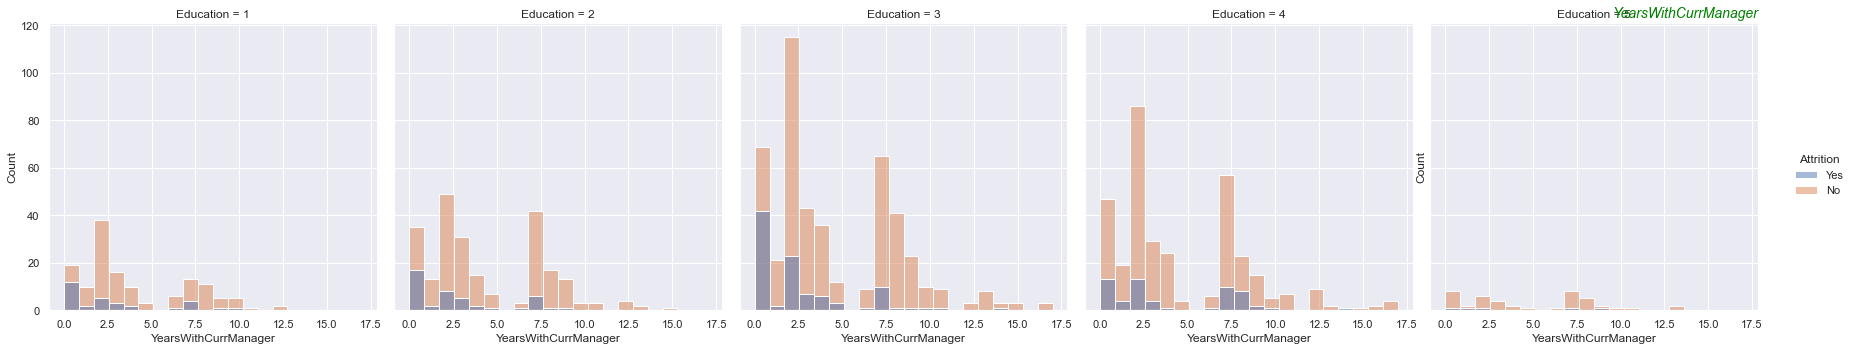

In [477]:
#Education (Below College/ College/ Bachelor/ Master/ Doctor)
for col in Ratio_Num_cols:
    sns.displot(HR_Dict, x=col, col='Education', hue='Attrition')
    plt.title (col , fontdict={'fontsize':14},loc="right",  fontstyle='oblique', color='green')
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.show()


**Comments:**

From the dataset, it is clear to find some characteristic features from Attrition group by Education as belows:
> * EnviromentSatisfaction: Bachelor_ Low, next _High
* JobIvolment: Bachelor_level:High
* JobLevel: Bachelor_level 1
* JobSatisfaction: Bachelor_ level Low, next High
* PerformanceRating: Bachelor_Excellent
* RelationshipSatisfaction:  Bachelor_level_High
* WorkLifeBalance: Bachelor level_ Better

#### **4.Correlation**

**Questions 1: **What are key factors that are playing into the current attrition rate?:**

In [520]:
# Find correlations with the target and sort
HR_Dict_trans = HR_Dict.copy()
HR_Dict_trans['Target'] = HR_Dict_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
HR_Dict_trans = HR_Dict_trans.drop(
    ['DailyRate', 'HourlyRate', 'EmployeeNumber'], axis=1)
correlations = HR_Dict_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<AxesSubplot:>

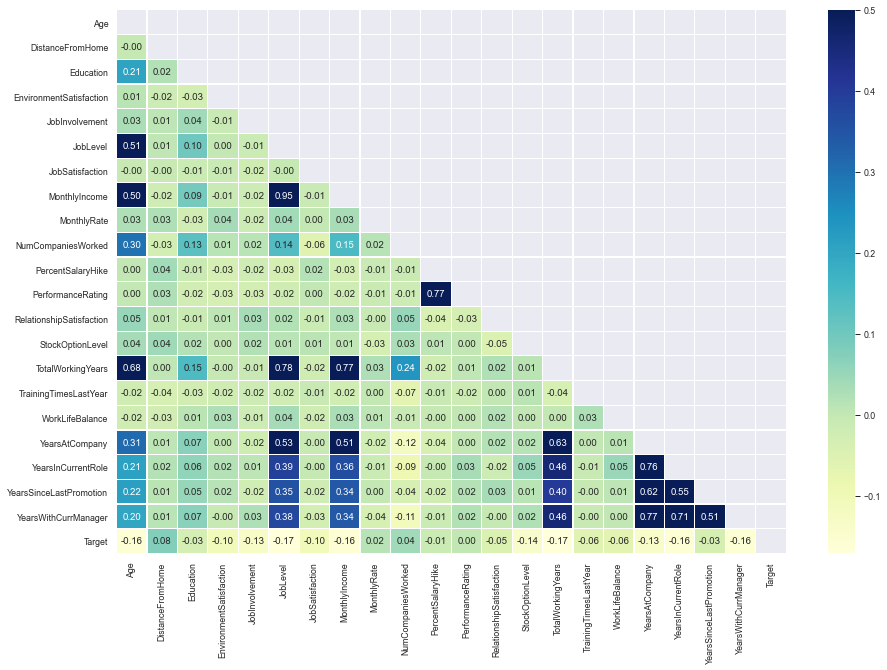

In [522]:
# Calculate correlations
corr = HR_Dict_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

From the Heatmap chart , it is clear to find key factors that have significant impact to Attrition as belows:
   - the Most 3 Positive Correlation  
> * DistanceFromHome
* NumCompaniesWorked
* MonthlyRate

   - the Most 3 Negative Correlation 
> * TotalWorkingYears
* JobLevel
* YearsINcurrentRole

**Questions 2: **What are key factors that are playing into the current satisfaction rates?:**

In [525]:
# Use the .value_counts method to summarize a column:
cnts = HR_Dict.JobSatisfaction.value_counts()
print(cnts)

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


In [526]:
# Find correlations with the target and sort
HR_Dict_trans_1 = HR_Dict.copy()
HR_Dict_trans_1['Target'] = HR_Dict_trans_1['JobSatisfaction']
HR_Dict_trans_1 = HR_Dict_trans_1.drop(
    ['DailyRate', 'HourlyRate', 'EmployeeNumber'], axis=1)
correlations = HR_Dict_trans_1.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating    0.002297
StockOptionLevel     0.010690
PercentSalaryHike    0.020002
JobSatisfaction      1.000000
Target               1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 NumCompaniesWorked     -0.055699
YearsWithCurrManager   -0.027656
JobInvolvement         -0.021476
TotalWorkingYears      -0.020185
WorkLifeBalance        -0.019459
Name: Target, dtype: float64


<AxesSubplot:>

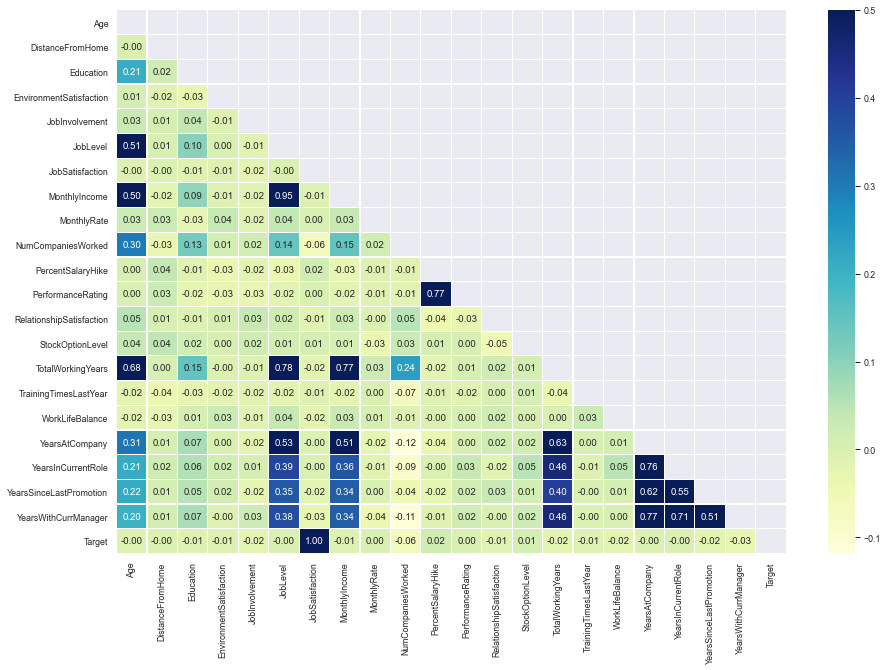

In [527]:
# Calculate correlations
corr = HR_Dict_trans_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

From the Heatmap chart , it is clear to find key factors that have significant impact to JobSatisfaction as belows:
   - the Most 3 Positive Correlation  
> * PercentSalaryHike
* StockOptionLevel
* PerformanceRating

   - the Most 3 Negative Correlation 
> * NumCompaniesWorked
* YearsWithCurrManager
* JobInvolvement

**Attrition Rate by Department**

In [490]:
HR_Dict_Dept = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(HR_Dict['Department'].unique()):
    ratio = HR_Dict[(HR_Dict['Department']==field)&(HR_Dict['Attrition']=="Yes")].shape[0] / HR_Dict[HR_Dict['Department']==field].shape[0]
    HR_Dict_Dept.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
HR_Dict_Dept['total'] = [100,100,100]
HR_DD = HR_Dict_Dept.groupby(by="Department").sum()
#df_DF.iplot(kind='bar',title='Leavers by Department (%)')


In Sales, the ratio of leavers is 20.63%
In Research & Development, the ratio of leavers is 13.84%
In Human Resources, the ratio of leavers is 19.05%


In [512]:
HR_Dict_Dept.sort_values('% of Leavers',ascending = False)

,Department,% of Leavers,total
0,Sales,20.627803,100
2,Human Resources,19.047619,100
1,Research & Development,13.839750,100


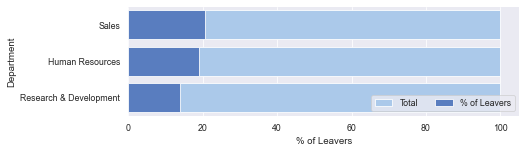

In [498]:
sns.set_context('paper')

HR_Dict_Dept_Sort = HR_Dict_Dept.sort_values('% of Leavers',ascending = False)
f, ax = plt.subplots(figsize = (7,2))
sns.set_color_codes('pastel')
sns.barplot(x = 'total' , y = 'Department', data = HR_Dict_Dept_Sort
            , label = 'Total', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = '% of Leavers', y = 'Department', data = HR_Dict_Dept_Sort
            , label = '% of Leavers', color = 'b', edgecolor = 'w')
ax.legend(ncol =2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

**Attrition Rate by JobRole**

In [502]:
# Use the .value_counts method to summarize a column:
cnts = HR_Dict.JobRole.value_counts()
print(cnts)

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


*% of Leavers*

In [505]:
HR_Dict_Role = pd.DataFrame(columns=["JobRole", "% of Leavers"])
i=0
for field in list(HR_Dict['JobRole'].unique()):
    ratio = HR_Dict[(HR_Dict['JobRole']==field)&(HR_Dict['Attrition']=="Yes")].shape[0] / HR_Dict[HR_Dict['JobRole']==field].shape[0]
    HR_Dict_Role.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
HR_Dict_Role['total'] = [100,100,100,100,100,100,100,100,100]
HR_DR = HR_Dict_Role.groupby(by="JobRole").sum()
#df_DF.iplot(kind='bar',title='Leavers by Department (%)')

In Sales Executive, the ratio of leavers is 17.48%
In Research Scientist, the ratio of leavers is 16.10%
In Laboratory Technician, the ratio of leavers is 23.94%
In Manufacturing Director, the ratio of leavers is 6.90%
In Healthcare Representative, the ratio of leavers is 6.87%
In Manager, the ratio of leavers is 4.90%
In Sales Representative, the ratio of leavers is 39.76%
In Research Director, the ratio of leavers is 2.50%
In Human Resources, the ratio of leavers is 23.08%


In [511]:
HR_Dict_Role.sort_values('% of Leavers',ascending = False)

,JobRole,% of Leavers,total
6,Sales Representative,39.759036,100
2,Laboratory Technician,23.938224,100
8,Human Resources,23.076923,100
0,Sales Executive,17.484663,100
1,Research Scientist,16.095890,100
3,Manufacturing Director,6.896552,100
4,Healthcare Representative,6.870229,100
5,Manager,4.901961,100
7,Research Director,2.500000,100


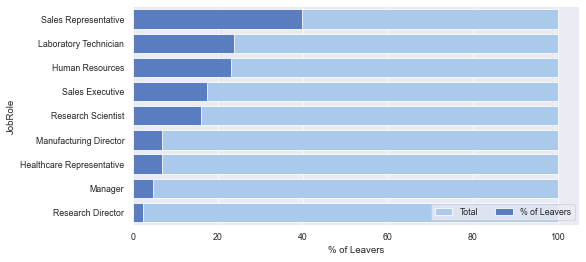

In [510]:
sns.set_context('paper')

HR_Dict_Role_Sort = HR_Dict_Role.sort_values('% of Leavers',ascending = False)
f, ax = plt.subplots(figsize = (8,4))
sns.set_color_codes('pastel')
sns.barplot(x = 'total' , y = 'JobRole', data = HR_Dict_Role_Sort
            , label = 'Total', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = '% of Leavers', y = 'JobRole', data = HR_Dict_Role_Sort
            , label = '% of Leavers', color = 'b', edgecolor = 'w')
ax.legend(ncol =2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()